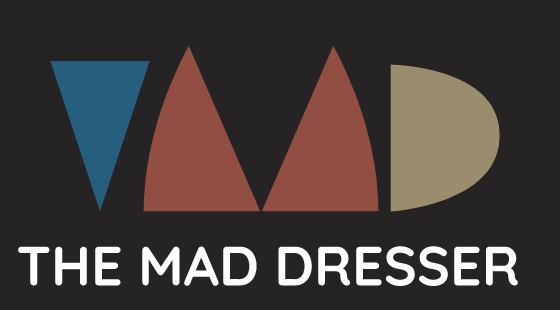

# The Mad Dresser : Data Science Demo Analysis Report



## Contact Information

- **Name** - Owais Ahmad
- **Phone** - +91-9515884381
- **Email** - owaiskhan9654@gmail.com
- **Portfolio** - https://owaiskhan9654.github.io/

## Objective  

To Showcase How Data Science Algorithms can help in building a Recommendation System which can be a help in utilizing the needs of customers.

## Data Acquisition

In order to collect the Data Amazon Rain forest API has been Utilized. This Data is in Json Format. Other Necessary Steps has been utilized to process and use the Data Efficiently 

- [Link to Download Processed Dataset](https://www.kaggle.com/owaiskhan9654/amazon-womens-shirts-dataset)

In [88]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
from tqdm import tqdm
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
import plotly.express as px
import plotly.graph_objects as go
from pandas_profiling import ProfileReport

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [4]:
from pprint import pprint
data = pd.read_json('tops_fashion.json')
print ('Number of data points : ', data.shape[0], \
       'Number of features/variables:', data.shape[1])

pprint(data.columns)
data.to_pickle('pickels/'+str(data.shape[0])+'_women_shirts_data')

Number of data points :  183138 Number of features/variables: 19
Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')


Of these 19 features, I will be using only 6 features in this task.
- asin  ( Amazon standard identification number)
- brand ( brand to which the product belongs to )
- color ( Color information of apparel, it can contain many colors as   a value ex: red and black stripes ) 
- product_type_name (type of the apperal,  WOMEN SHIRTS )
- medium_image_url  ( url of the image )
- title (title of the product.)
- formatted_price (price of the product)

In [5]:
data=data[data['product_type_name']=='SHIRT']

In [6]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])
data.head()

Number of data points :  167794 Number of features: 7


asin         brand              color  \
0  B016I2TS4W         FNC7C               None   
1  B01N49AI08  FIG Clothing               None   
2  B01JDPCOHO  FIG Clothing               None   
3  B01N19U5H5       Focal18               None   
4  B004GSI2OS   FeatherLite  Onyx Black/ Stone   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26

In [7]:
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])



Number of data points After eliminating price=NULL : 21513
Number of data points After eliminating color=NULL : 21504


In [8]:
mkdir Raw_images\\SHIRTS

A subdirectory or file Raw_images\\SHIRTS already exists.


In [9]:
'''
url_not_found =[]
index_not_found =[]
for index,row in tqdm(data.iterrows()):
        url = row['medium_image_url']
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            img.save('Raw_images/SHIRTS/'+row['asin']+'.jpeg')
            
        except:
            url_not_found.append(url)
            index_not_found.append(index)'''

"#for dowloading images from the json file containg the links of the images \nurl_not_found =[]\nindex_not_found =[]\nfor index,row in tqdm(data.iterrows()):\n        url = row['medium_image_url']\n        response = requests.get(url)\n        try:\n            img = Image.open(BytesIO(response.content))\n            img.save('Raw_images/SHIRTS/'+row['asin']+'.jpeg')\n            \n        except:\n            url_not_found.append(url)\n            index_not_found.append(index)"

In [10]:
files_downloaded=os.listdir('Raw_images/SHIRTS/')

for i in range(0,len(files_downloaded)):
    
    files_downloaded[i]=files_downloaded[i].replace('.jpeg','')

In [11]:
data = data[data.asin.isin(files_downloaded)]

In [12]:
data.reset_index(drop=True,inplace=True)
data

asin                        brand              color  \
0      B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
1      B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
2      B001LOUGE4                 Fitness Etc.              Black   
3      B003BSRPB0                  FeatherLite              White   
4      B014ICEDNA                        FNC7C             Purple   
...           ...                          ...                ...   
14333  B01FIVXRV4                        DKNYC            Leopard   
14334  B0753Z7N8W                susana monaco           Tanseite   
14335  B06Y1B4Z8L                     Style&Co               Blue   
14336  B00WKXS1NI                      Jerzees              Black   
14337  B01FRGDGK2             Stella McCartney              Multi   

                                        medium_image_url product_type_name  \
0      https://images-na.ssl-images-amazon.com/images...             SHIRT   
1      https://images-na.ssl-images-amazon.com/images...             SHIRT   
2      https://images-na.ssl-images-amazon.com/images...             SHIRT   
3      https://images-na.ssl-images-amazon.com/images...             SHIRT   
4      https://images-na.ssl-images-amazon.com/images...             SHIRT   
...                                                  ...               ...   
14333  https://images-na.ssl-images-amazon.com/images...             SHIRT   
14334  https://images-na.ssl-images-amazon.com/images...             SHIRT   
14335  https://images-na.ssl-images-amazon.com/images...             SHIRT   
14336  https://images-na.ssl-images-amazon.com/images...             SHIRT   
14337  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                   title formatted_price  
0      Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
1      Women's Unique 100% Cotton T - Special Olympic...           $9.99  
2                 Ladies Cotton Tank 2x1 Ribbed Tank Top          $11.99  
3      FeatherLite Ladies' Moisture Free Mesh Sport S...          $20.54  
4      Supernatural Chibis Sam Dean And Castiel Short...           $7.50  
...                                                  ...             ...  
14333  DKNYC WOMENS LAYERED LOOK-BUILT IN FAUX SHIRT ...          $19.99  
14334  Susana Monaco Womens Cleo One-Shoulder Top, Xs...          $65.99  
14335  Blue 2 In 1 Tank Style Scoop Neck Cap Sleeve S...           $7.99  
14336  Jerzees Ladies' 5.3 oz., 65/35 Easy-Care™ Polo...           $7.43  
14337       Stella McCartney Women's Striped Floral Tank         $139.97  

[14338 rows x 7 columns]

In [89]:
profile = ProfileReport(data, title="Amazon Women Shirts Data Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
print('Number of data points After eliminating images which were not accesible :', data.shape[0])

Number of data points After eliminating images which were not accesible : 14338


In [14]:
data.to_pickle('pickels/'+str(data.shape[0])+'_women_shirts_data')

In [15]:
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 14136




<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

In [16]:
print('The number of entries with duplicate title is %d'%sum(data.duplicated('title')))
data_sorted.sort_values('title',inplace=True, ascending=False)

indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:    
    previous_i = i
    a = data['title'].loc[indices[i]].split()
    
    j = i+1
    while j < num_data_points:
        
        b = data['title'].loc[indices[j]].split()
        
        length = max(len(a), len(b))
        
        count  = 0
        
        
        
        
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1
        
        
        if (length - count) > 2: 
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
            
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points now is: ', data.shape[0])
data.to_pickle('pickels/'+str(data.shape[0])+'_women_shirts_data')

The number of entries with duplicate title is 839
Number of data points now is:  9911


<pre>

In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

</pre>

In [17]:
%%time


indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    
    a = data['title'].loc[i].split()
    
    for j in indices:        
        b = data['title'].loc[j].split()
        
        length = max(len(a),len(b))        
        
        count  = 0
        
        
        
        
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1
        
        if (length - count) < 3:
            indices.remove(j)
            
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]
print('Number of data points after stage two of dedupe: ',data.shape[0])
data.to_pickle('pickels/'+str(data.shape[0])+'_women_shirts_data')

Number of data points after stage two of dedupe:  9391
Wall time: 17min 40s


In [18]:


stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            
            word = ("".join(e for e in words if e.isalnum()))
            
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'she', 'couldn', 'did', 'you', "that'll", 'we', "you're", "shouldn't", 'up', 'his', 'just', 'above', 'was', "couldn't", 'here', 'me', 'its', 'then', 'y', 'few', 'these', 'he', 'own', 'because', 'isn', 'when', "it's", 'of', 'no', 'with', 'will', 're', 'ma', 'wasn', 'their', 'the', 'hasn', "she's", 'do', 't', 'if', 'from', 'doesn', "haven't", 'this', "you've", 'once', 'who', 'your', 'yourself', "hadn't", 'there', "you'll", 'i', 'our', 'are', 'most', 'd', 'at', 'during', 'mustn', 'had', 'under', 'themselves', 'other', 've', "isn't", 'about', 'nor', 'any', 'shan', 'they', 'further', 'ain', "didn't", "doesn't", 'now', "you'd", 'for', 'both', 'too', 'having', 'itself', 'before', 'each', "wasn't", 'my', 'can', 'shouldn', 'until', 'be', 'were', 'some', 'hers', 'him', 'aren', 'didn', "weren't", "wouldn't", 'only', 'through', 'as', 's', 'weren', 'which', 'very', 'herself', 'what', 'but', 'to', 'himself', "aren't", 'so', 'needn', 'all', 'in', 'down', 'or', 'whom', "don't", 'w

In [19]:
start_time = time.time()

for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

print(time.time() - start_time, "seconds")

data.head()
data.to_pickle('pickels/'+str(data.shape[0])+'_women_shirts_data')

3.0838680267333984 seconds


In [20]:



def display_img(url,ax,fig):
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    plt.imshow(img)


def plot_heatmap(keys, values, labels, url, text):
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        
        ax = plt.subplot(gs[0])
        
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) 
        ax.set_title(text) 
        
        
        ax = plt.subplot(gs[1])
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        
        display_img(url, ax, fig)
        
        
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    
    keys = list(vec2.keys())
    
    values = [vec2[x] for x in vec2.keys()]    
    
        
        
        
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            
            
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            
            
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plot_heatmap(keys, values, labels, url, text)


def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    
    
    return Counter(words) 
    

def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b    
    
    vector1 = text_to_vector(text1)
    
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() 



bag_of_words_euclidean=[]
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        bag_of_words_euclidean.append(pdists[i])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)
    print('Average euclidean distance is ',sum(bag_of_words_euclidean)/num_results)



Getting the similar items for document id and number of items


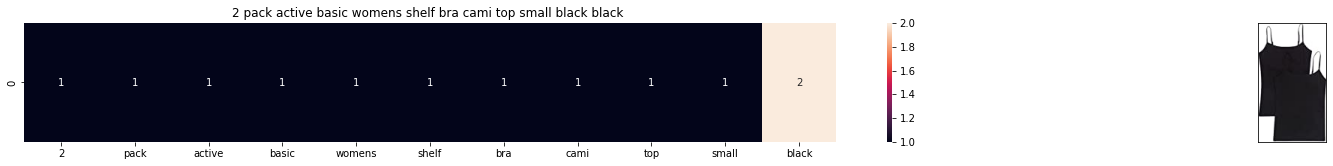

ASIN : B00VJ19SSO
Brand: Active Products
Title: 2 pack active basic womens shelf bra cami top small black black 
Euclidean similarity with the query image : 0.0


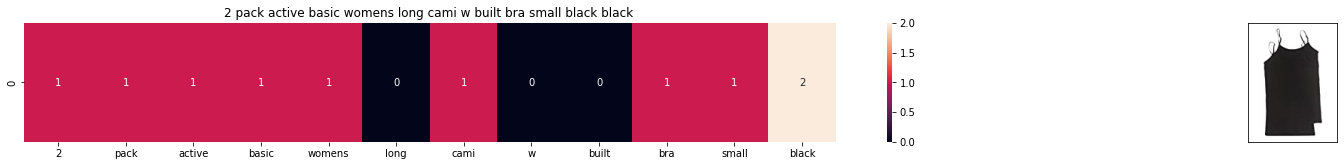

ASIN : B00K5BHL06
Brand: Active USA
Title: 2 pack active basic womens long cami w built bra small black black 
Euclidean similarity with the query image : 2.0


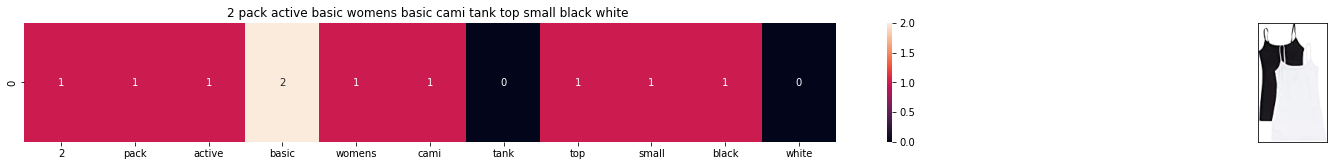

ASIN : B00VIU79DW
Brand: Active Products
Title: 2 pack active basic womens basic cami tank top small black white 
Euclidean similarity with the query image : 2.449489742783178


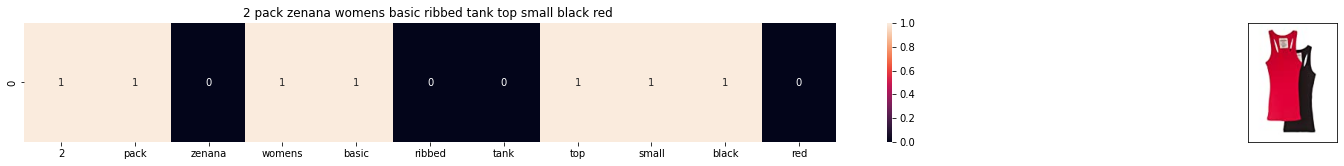

ASIN : B00HDZM2RO
Brand: Zenana Outfitters
Title: 2 pack zenana womens basic ribbed tank top small black red 
Euclidean similarity with the query image : 3.0


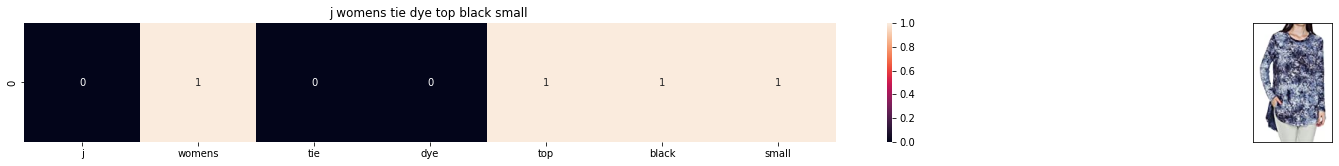

ASIN : B075831F14
Brand: Very J
Title: j womens tie dye top black small 
Euclidean similarity with the query image : 3.0


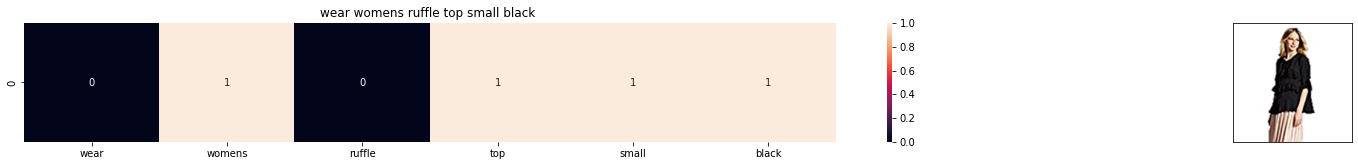

ASIN : B07258X2FK
Brand: Who What Wear
Title: wear womens ruffle top small black 
Euclidean similarity with the query image : 3.0


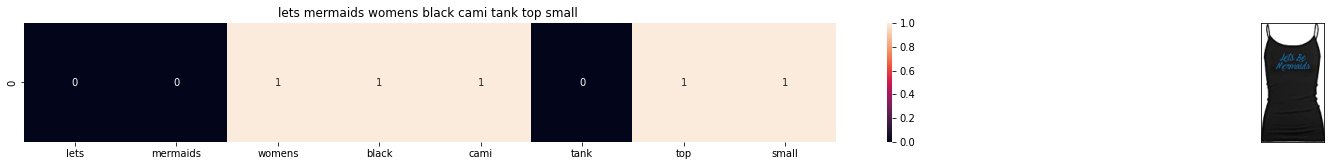

ASIN : B01N44FN88
Brand: Project Pinup
Title: lets mermaids womens black cami tank top small 
Euclidean similarity with the query image : 3.0


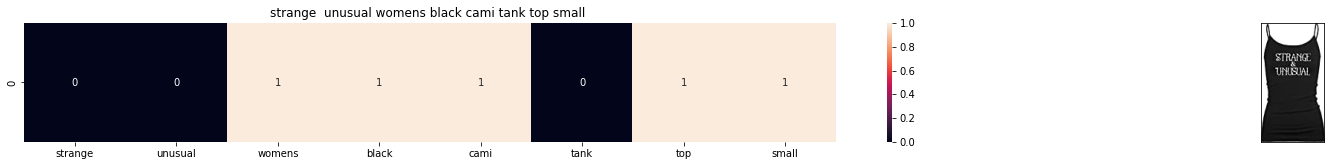

ASIN : B01MXOSQR4
Brand: Project Pinup
Title: strange  unusual womens black cami tank top small 
Euclidean similarity with the query image : 3.0


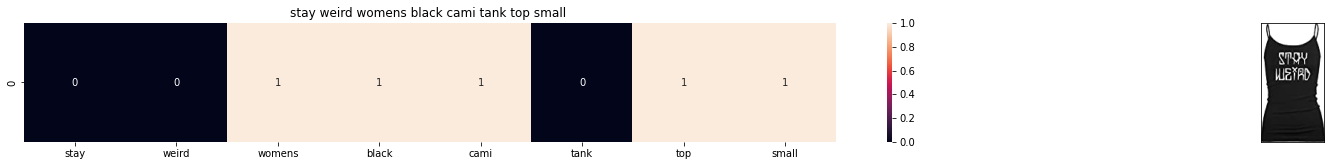

ASIN : B01NCB6I63
Brand: Project Pinup
Title: stay weird womens black cami tank top small 
Euclidean similarity with the query image : 3.0


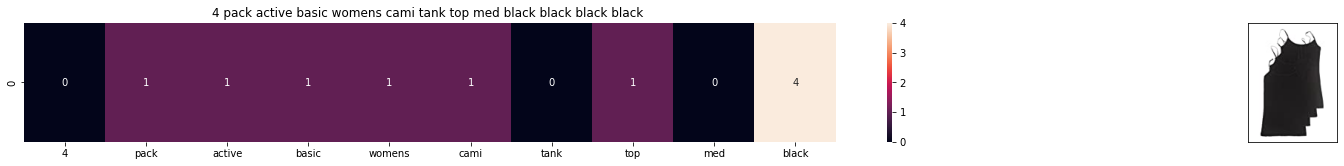

ASIN : B00XIM5SCC
Brand: Active USA
Title: 4 pack active basic womens cami tank top med black black black black 
Euclidean similarity with the query image : 3.0


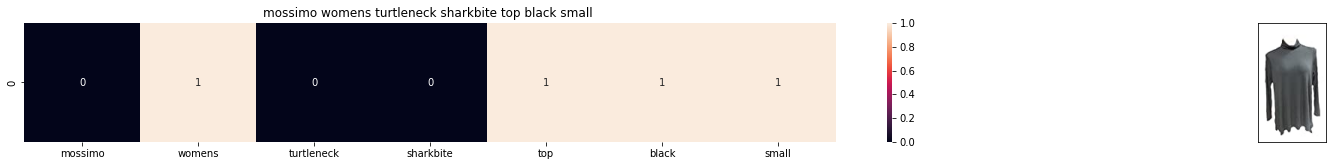

ASIN : B072J7FBTS
Brand: Mossimo Supply Co
Title: mossimo womens turtleneck sharkbite top black small 
Euclidean similarity with the query image : 3.1622776601683795


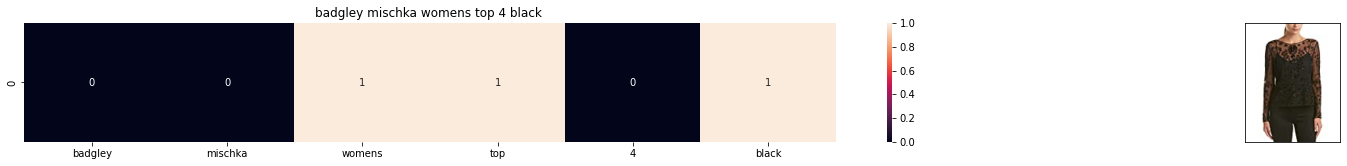

ASIN : B074TWLMJ8
Brand: Badgley Mischka
Title: badgley mischka womens top 4 black 
Euclidean similarity with the query image : 3.1622776601683795


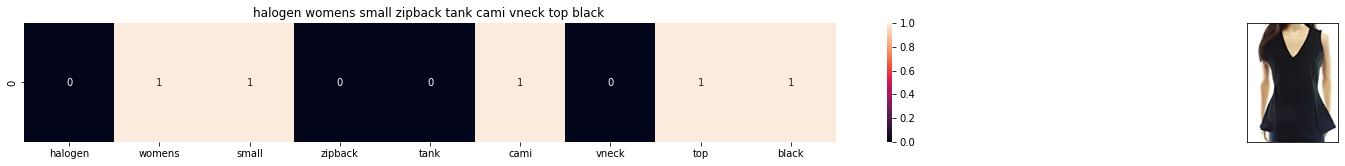

ASIN : B01N9ZYVT6
Brand: Halogen
Title: halogen womens small zipback tank cami vneck top black 
Euclidean similarity with the query image : 3.1622776601683795


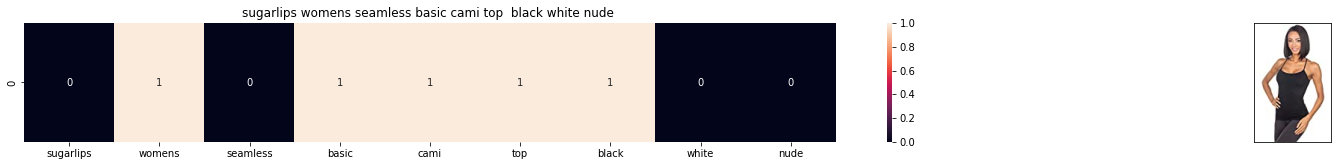

ASIN : B00XM32ZLO
Brand: Sugar Lips
Title: sugarlips womens seamless basic cami top  black white nude 
Euclidean similarity with the query image : 3.1622776601683795


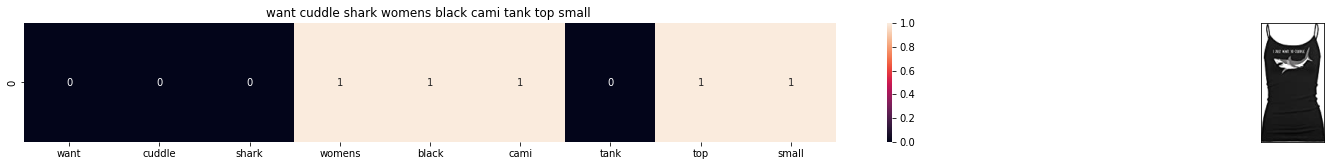

ASIN : B06XD7FVXY
Brand: Project Pinup
Title: want cuddle shark womens black cami tank top small 
Euclidean similarity with the query image : 3.1622776601683795
Average euclidean distance is  9.136887207632098


In [26]:
print('Getting the similar items for document id and number of items')
bag_of_words_model(998, 15)

In [27]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

tf_idf_euclidean=[]
def tfidf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]

    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]],data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        tf_idf_euclidean.append(pdists[i])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is',sum(tf_idf_euclidean)/num_results)


Getting the similar items for document id and number of items


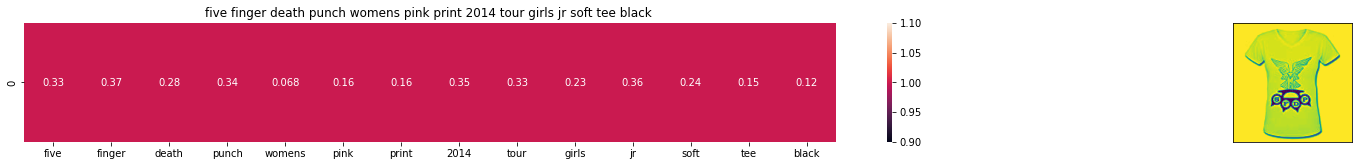

ASIN : B0148RPYQK
BRAND : Five Finger Death Punch
Eucliden distance from the given image : 0.0


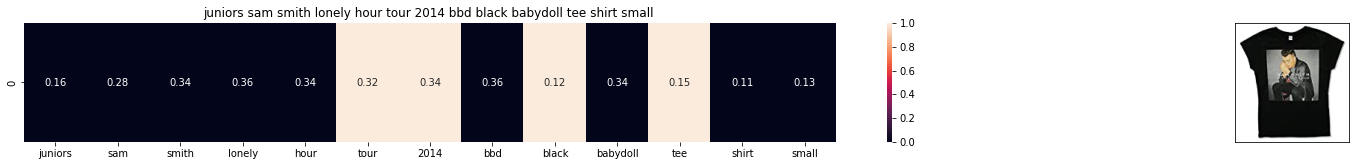

ASIN : B00Y125DYQ
BRAND : Bay Island Sportswear
Eucliden distance from the given image : 1.2165614771893531


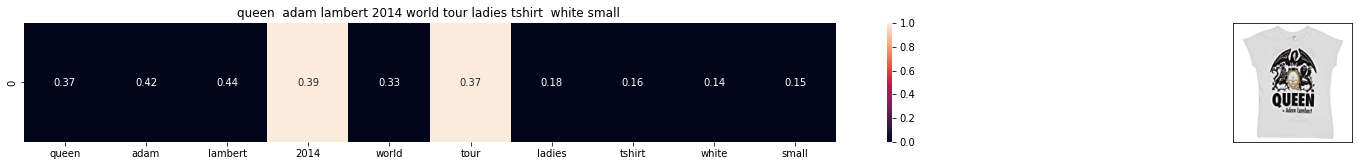

ASIN : B00WA9MXLI
BRAND : Queen
Eucliden distance from the given image : 1.2182232235584929


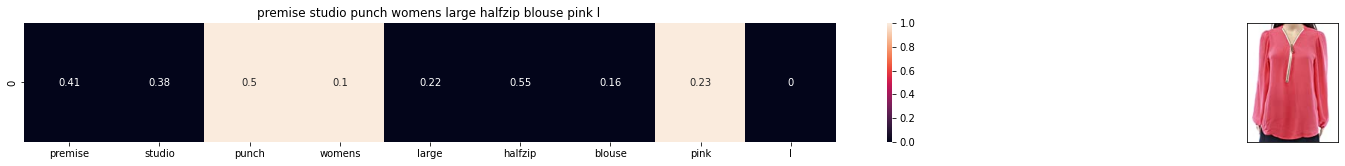

ASIN : B0751JGSCS
BRAND : Premise Studio
Eucliden distance from the given image : 1.2555310786185432


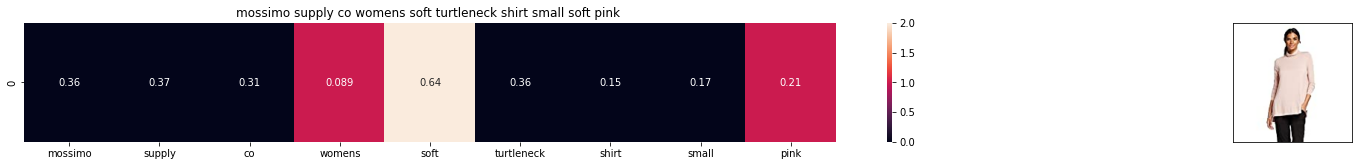

ASIN : B071YSN9YY
BRAND : Mossimo Supply Co
Eucliden distance from the given image : 1.2703387736934366


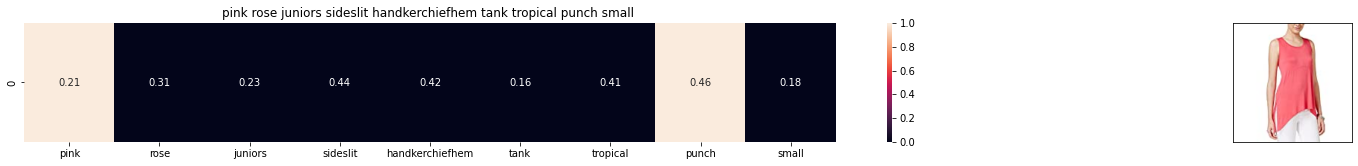

ASIN : B06WVLSG56
BRAND : PINK ROSE
Eucliden distance from the given image : 1.2747444052507093


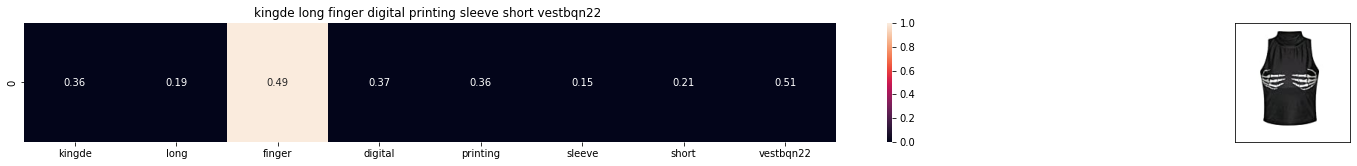

ASIN : B015H3W0TS
BRAND : KINGDE
Eucliden distance from the given image : 1.2792767914595835


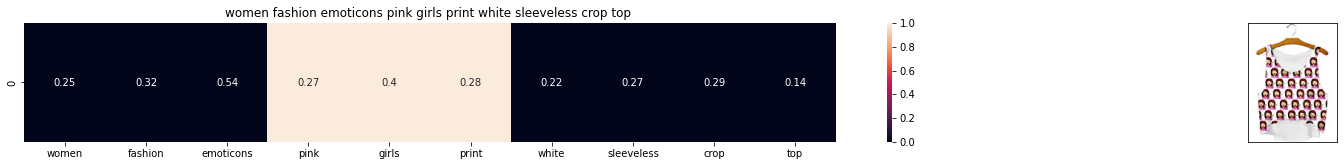

ASIN : B00X6PG41A
BRAND : MKP Crop Top
Eucliden distance from the given image : 1.279342200913531


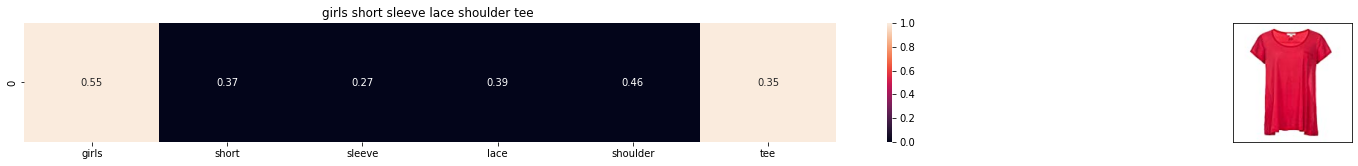

ASIN : B074H47ZBD
BRAND : Joyce Clapham
Eucliden distance from the given image : 1.2808232647379771


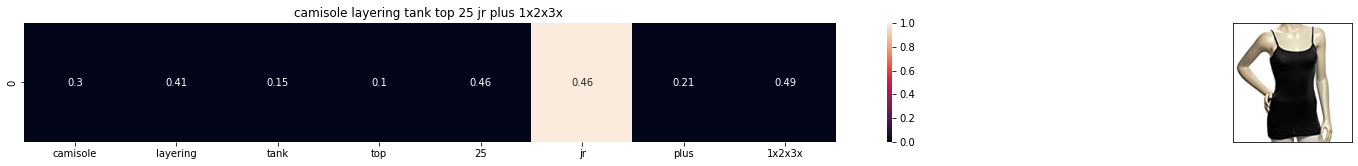

ASIN : B017Z5JH5Q
BRAND : Zanana Outfitters
Eucliden distance from the given image : 1.2924454308821312


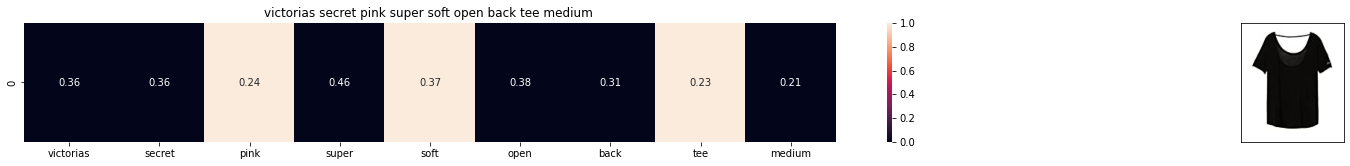

ASIN : B0741M61TC
BRAND : VS PINK
Eucliden distance from the given image : 1.2945519458207249


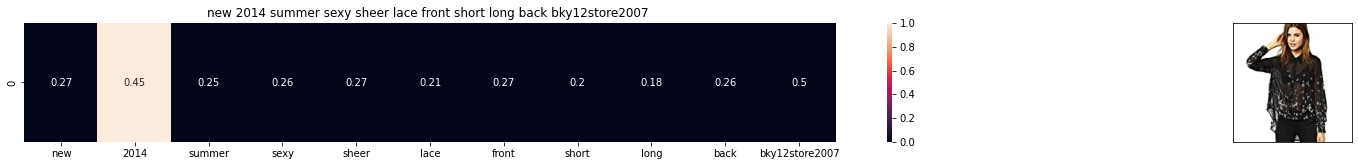

ASIN : B011XO56G4
BRAND : bankhunyabangyai store
Eucliden distance from the given image : 1.296630578263876


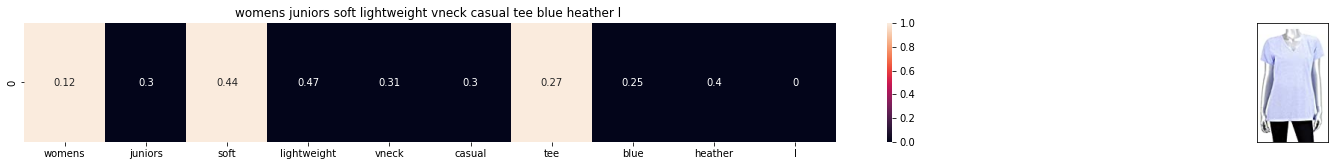

ASIN : B01HCSZ4HG
BRAND : Hybrid Apparel
Eucliden distance from the given image : 1.29991873117793


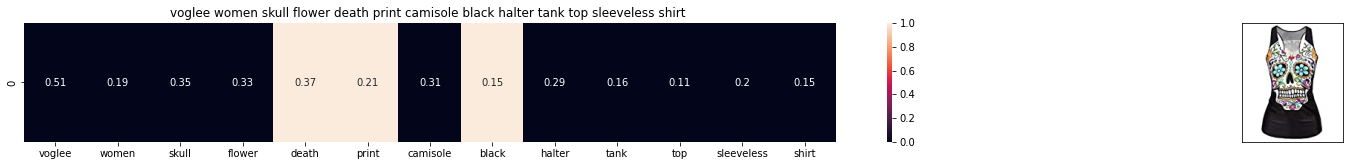

ASIN : B017XPFUMW
BRAND : Voglee
Eucliden distance from the given image : 1.3000007188194629


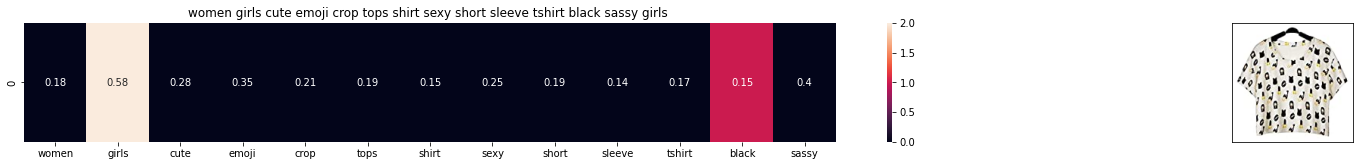

ASIN : B012H0IQWY
BRAND : HowCome Crop Top Shirt
Eucliden distance from the given image : 1.3029721150693045
Average euclidean distance is 1.1907573823636706


In [28]:
print('Getting the similar items for document id and number of items')
tfidf_model(66, 15)

In [29]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])



In [30]:
def n_containing(word):
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    return math.log(data.shape[0] / (n_containing(word)))

In [31]:
%%time
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    idf_val = idf(i)
    
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:    
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val

Wall time: 1min 51s


In [32]:
idf_euclidean=[]
def idf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        idf_euclidean.append(pdists[i])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is ',sum(idf_euclidean)/num_results)

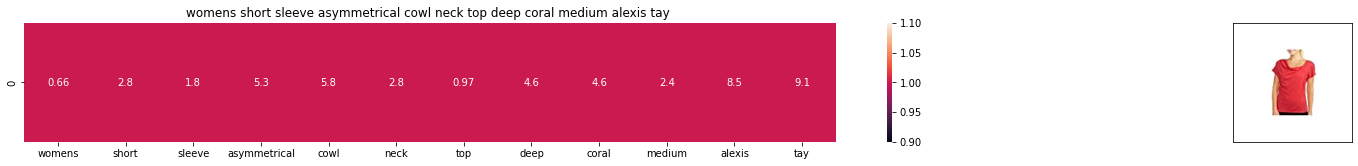

ASIN : B06XXS7683
Brand : Alexis Taylor
euclidean distance from the given image : 0.0


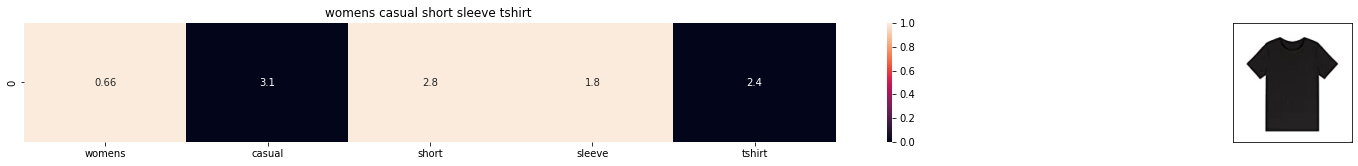

ASIN : B074T9KG9Q
Brand : Rain
euclidean distance from the given image : 17.006762005047516


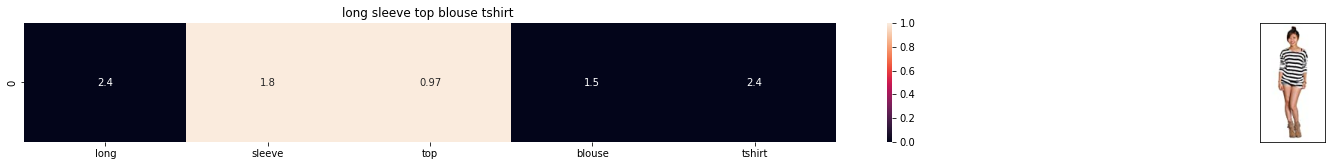

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 17.191284126497184


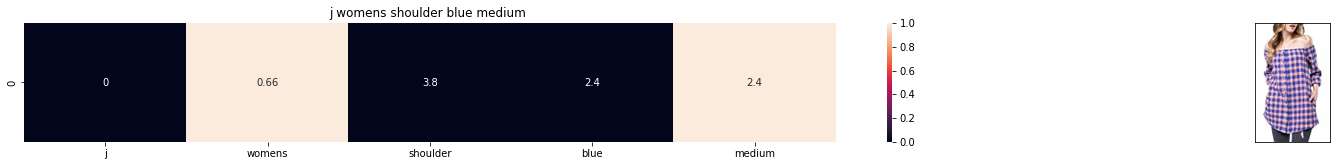

ASIN : B07581F4DG
Brand : Very J
euclidean distance from the given image : 17.307548928160667


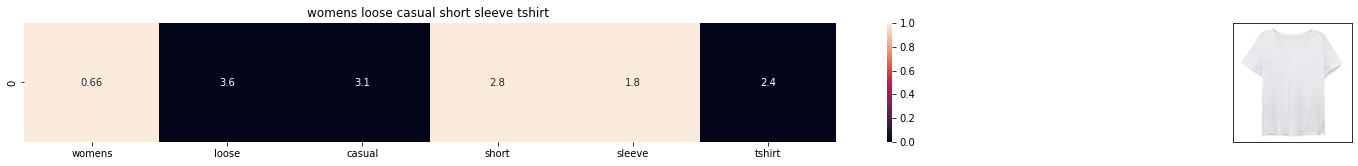

ASIN : B07567M2M9
Brand : Sunshine
euclidean distance from the given image : 17.38409424086828


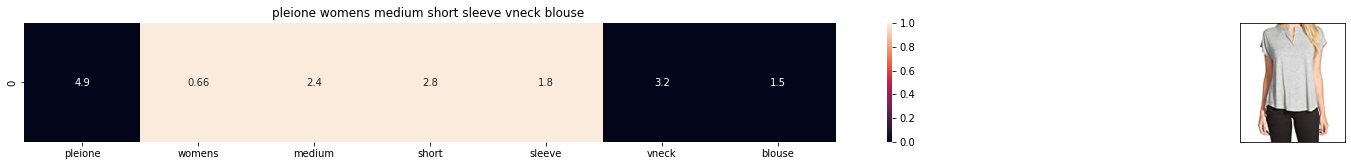

ASIN : B0758WDS6H
Brand : Pleione
euclidean distance from the given image : 17.462601457626473


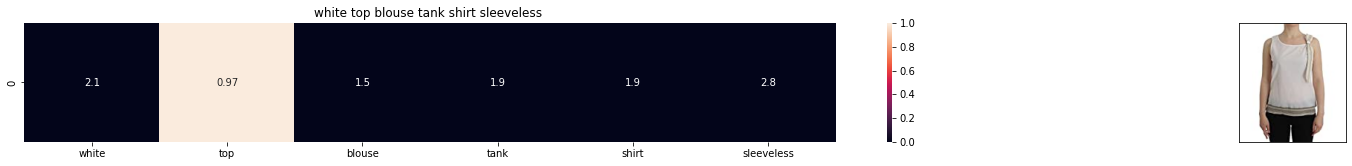

ASIN : B074G5G5RK
Brand : ERMANNO SCERVINO
euclidean distance from the given image : 17.505125169803332


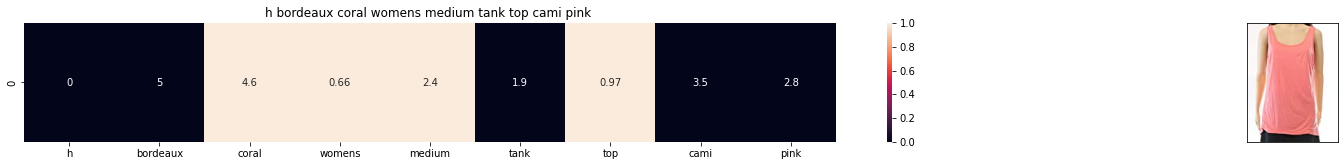

ASIN : B071ZSHMPC
Brand : H By Bordeaux
euclidean distance from the given image : 17.506212466863413


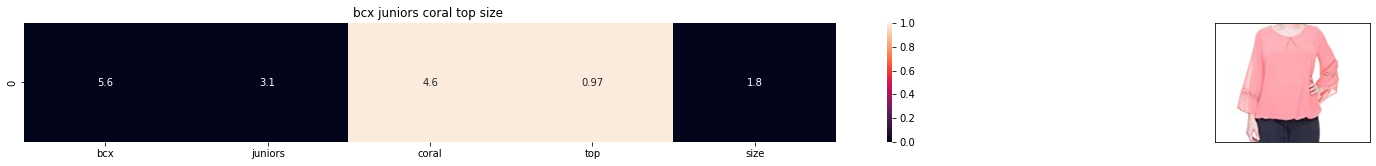

ASIN : B06XWYL8XD
Brand : BCX
euclidean distance from the given image : 17.527596182043442


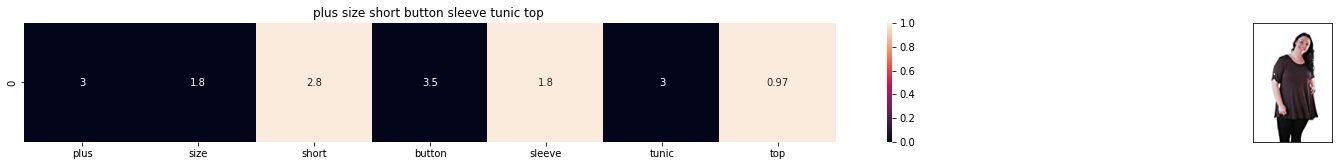

ASIN : B00JMA25AW
Brand : Girltalk clothing
euclidean distance from the given image : 17.529903054592896


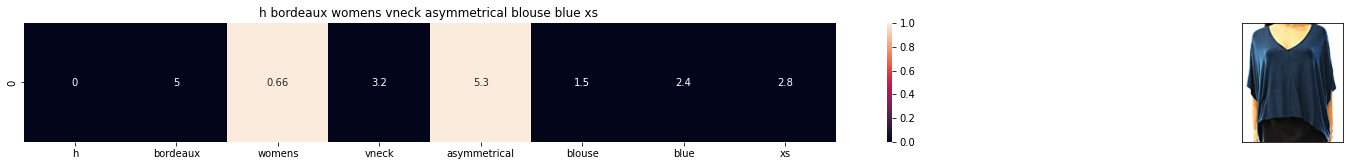

ASIN : B071VRD8V6
Brand : H By Bordeaux
euclidean distance from the given image : 17.578004803970824


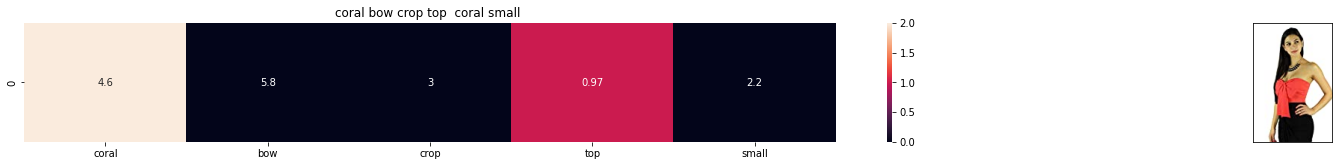

ASIN : B01HT0K0XK
Brand : Lushfox
euclidean distance from the given image : 17.633967527941678


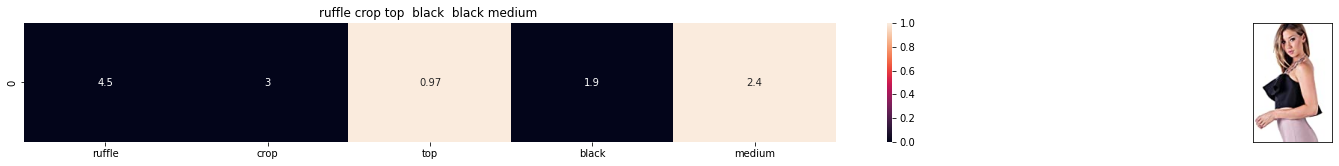

ASIN : B01HT0OL3K
Brand : Lushfox
euclidean distance from the given image : 17.660502601765014


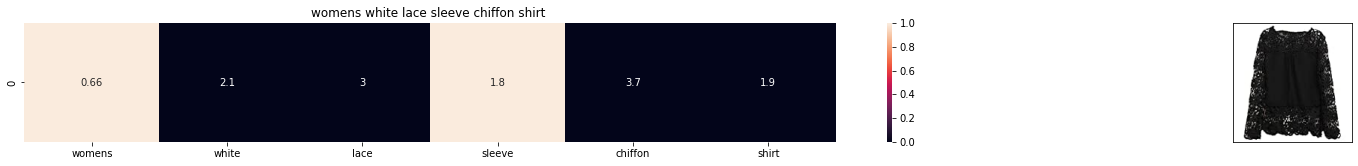

ASIN : B00XPU33FQ
Brand : Fuming
euclidean distance from the given image : 17.687083134239675


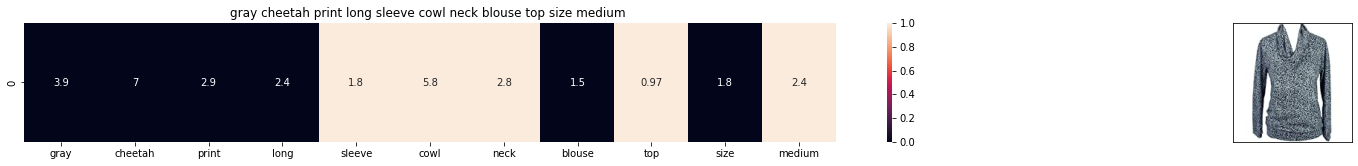

ASIN : B005L89LDI
Brand : Annabelle
euclidean distance from the given image : 17.840659301915593
Average euclidean distance is  16.32142300008907


In [33]:
idf_model(1466, 15)

In [34]:
'''import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')
import pickle

file = open('word2vec_model.pkl', 'wb')
pickle.dump(word2vec_model, file)
file.close()'''

"import gensim.downloader as api\nword2vec_model = api.load('word2vec-google-news-300')\nimport pickle\n\nfile = open('word2vec_model.pkl', 'wb')\npickle.dump(word2vec_model, file)\nfile.close()"

In [35]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
with open('word2vec_model.pkl', 'rb') as handle:
    model = pickle.load(handle)
    

In [36]:
def get_word_vec(sentence, doc_id, m_name):
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:

            vec.append(np.zeros(shape=(300,)))

    return  np.array(vec)

def get_distance(vec1, vec2):

    
    final_dist = []
    for i in vec1:
        dist = []
        for j in vec2:
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):

    s1_vec = get_word_vec(sentence1, doc_id1, model)
    
    s2_vec = get_word_vec(sentence2, doc_id2, model)
    
    
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    
    ax.set_xticklabels(sentence2.split())
    
    ax.set_yticklabels(sentence1.split())
    
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [37]:

vocab = model.index_to_key 
def build_avg_vec(sentence, num_features, doc_id, m_name):
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    
    return featureVec

In [38]:
%%time
doc_id = 0
w2v_title = []
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1
w2v_title = np.array(w2v_title)

Wall time: 18min 5s


In [39]:
avg_w2v_euclidean=[]
def avg_w2v_model(doc_id, num_results):
        
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        avg_w2v_euclidean.append(pdists[i])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)
    print('Average euclidean distance is ',sum(avg_w2v_euclidean)/num_results)

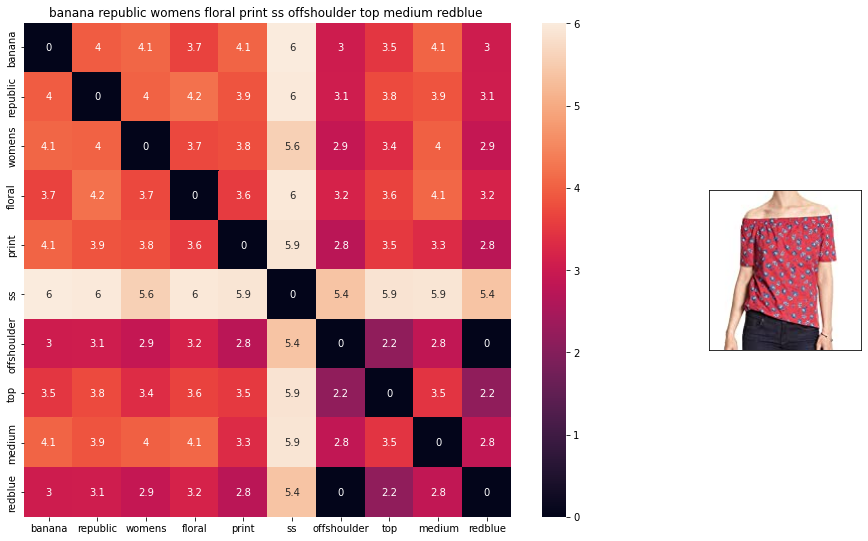

ASIN : B0746ZVMJ7
BRAND : Banana Republic Factory Store
euclidean distance from given input image : 0.0


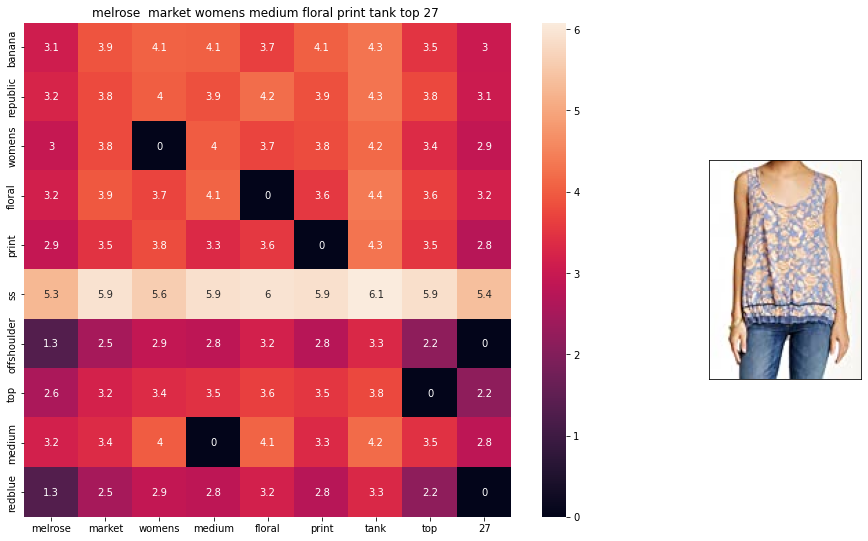

ASIN : B0758PTMYJ
BRAND : Melrose & Market
euclidean distance from given input image : 0.81187904


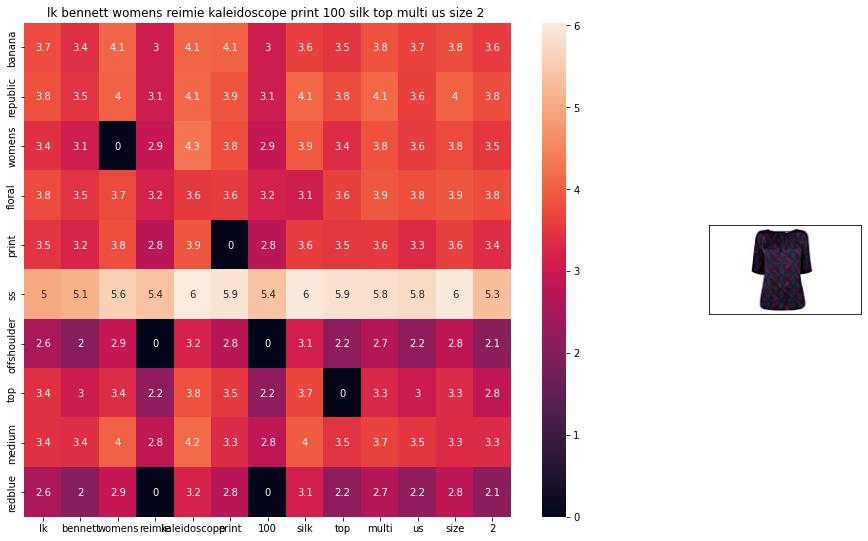

ASIN : B00LQD3J8A
BRAND : L.K. Bennett
euclidean distance from given input image : 0.81762654


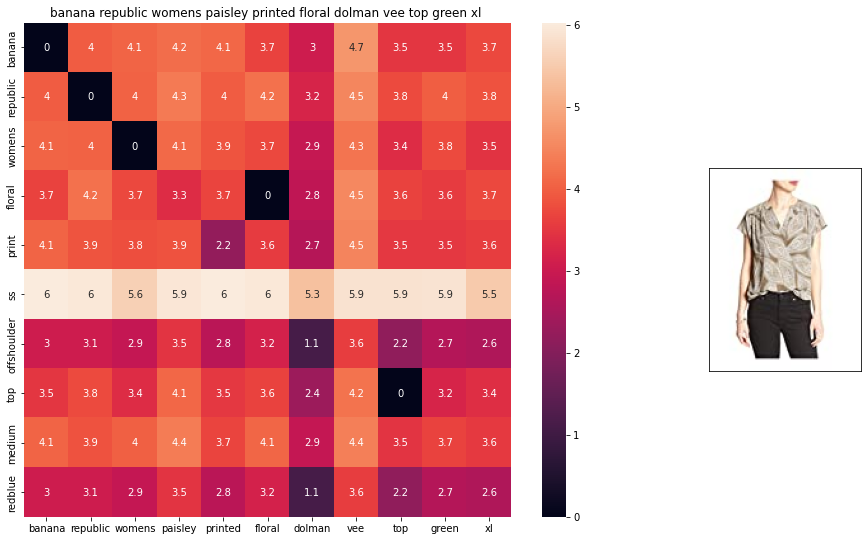

ASIN : B06XNXRK6K
BRAND : Banana Republic
euclidean distance from given input image : 0.84567016


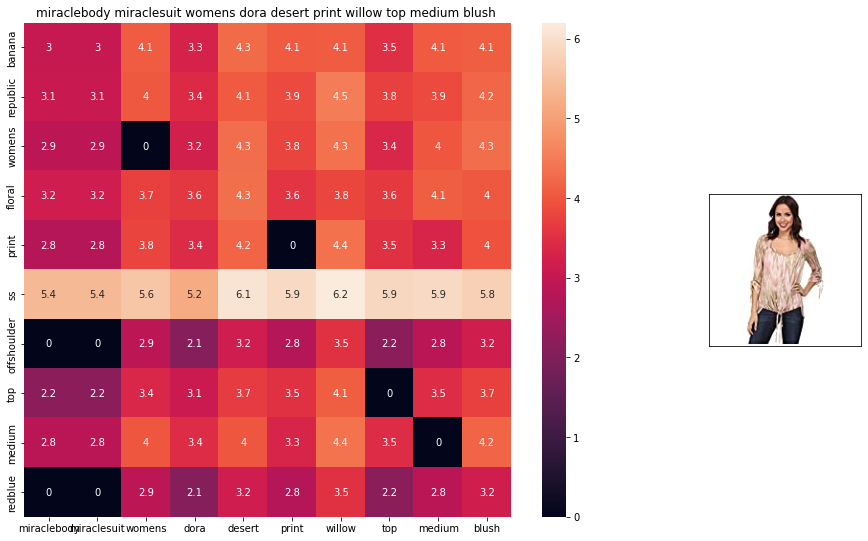

ASIN : B00OTB3KJO
BRAND : Miraclebody by Miraclesuit
euclidean distance from given input image : 0.8591212


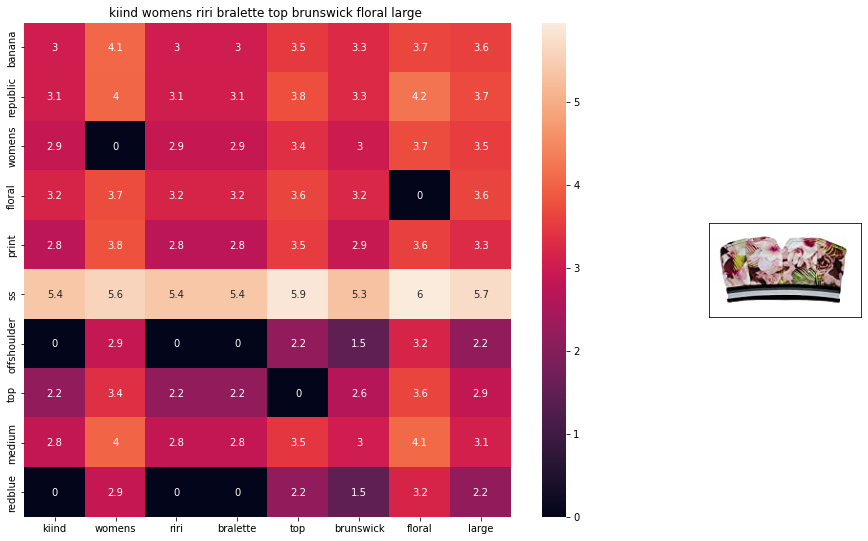

ASIN : B01I7DCWFC
BRAND : KIIND OF
euclidean distance from given input image : 0.8738429


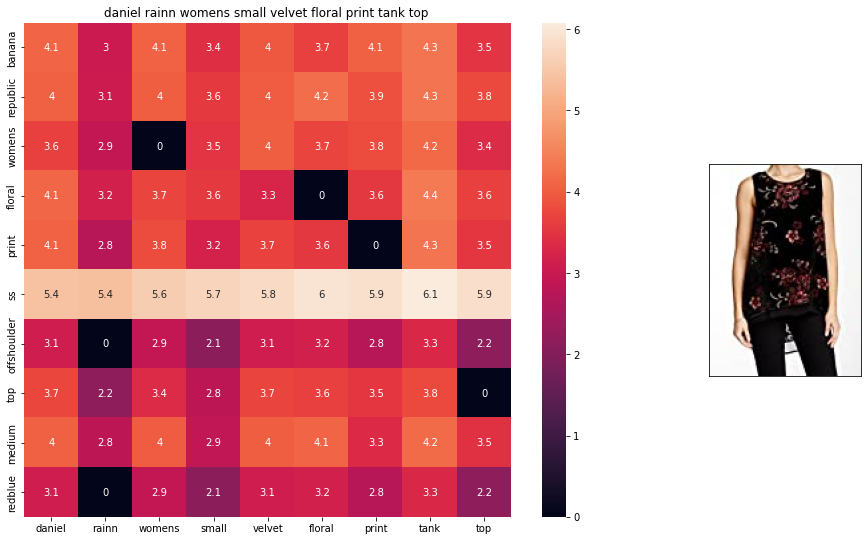

ASIN : B0758VCXC8
BRAND : Daniel Rainn
euclidean distance from given input image : 0.8769885


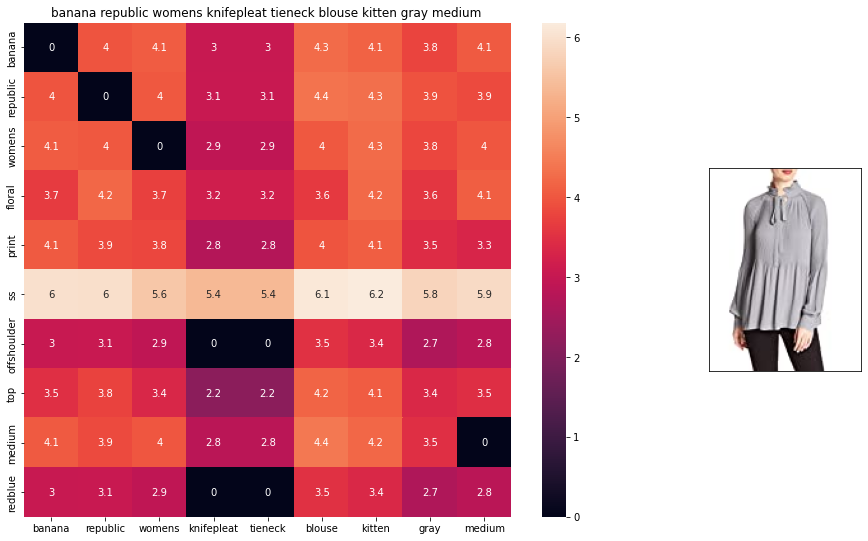

ASIN : B06XZSQ467
BRAND : Banana Republic
euclidean distance from given input image : 0.8774647


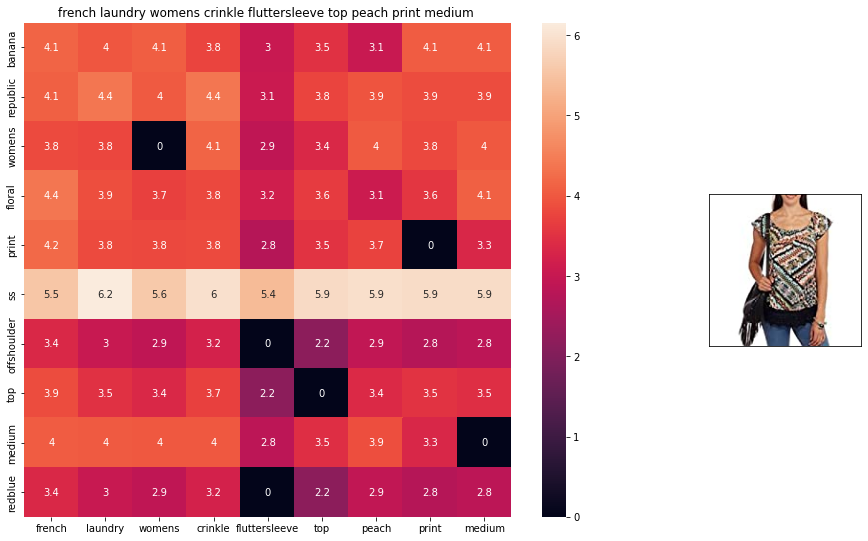

ASIN : B06XX33JLB
BRAND : French Laundry
euclidean distance from given input image : 0.8875258


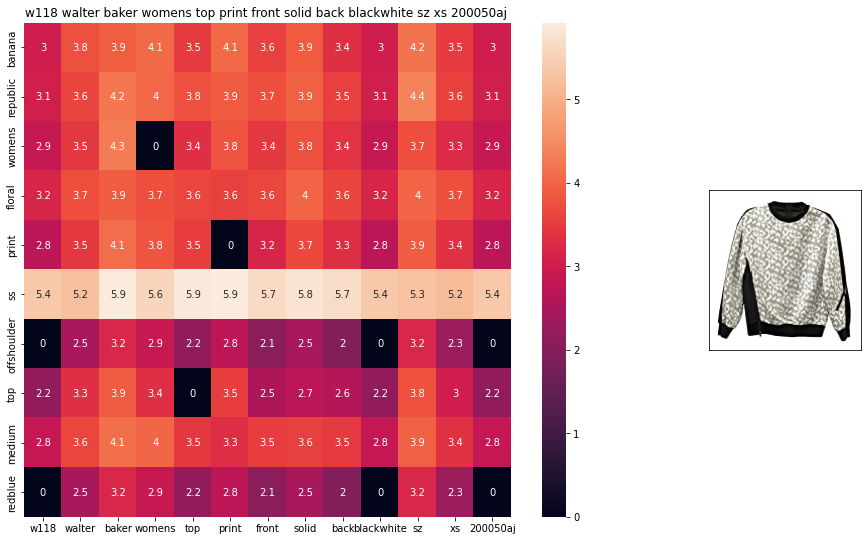

ASIN : B00DQ4ZDWC
BRAND : W118 by Walter Baker
euclidean distance from given input image : 0.89426047


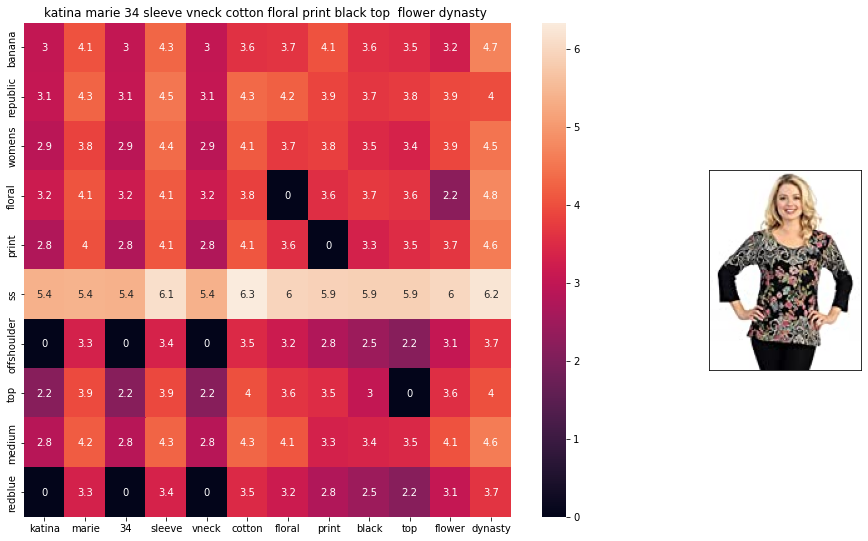

ASIN : B00WOSZ3W6
BRAND : Katina Marie
euclidean distance from given input image : 0.89900255


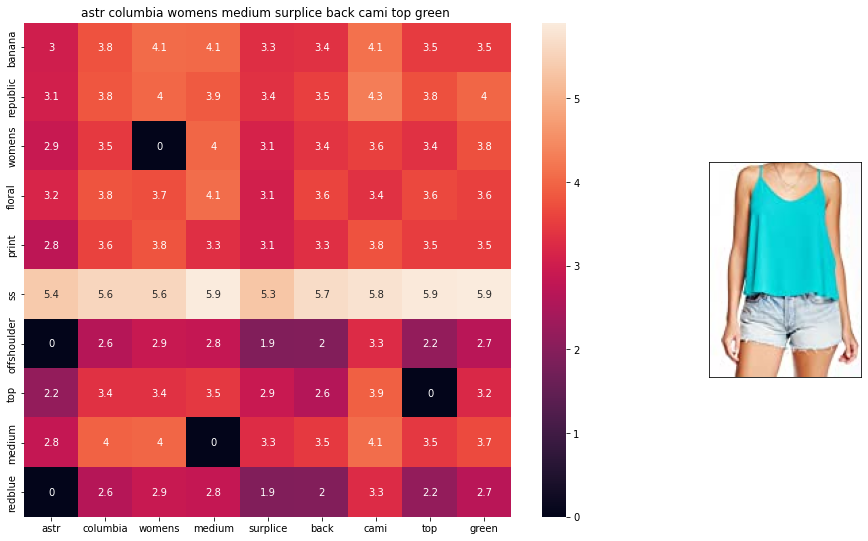

ASIN : B073P8C2M1
BRAND : ASTR
euclidean distance from given input image : 0.90407705


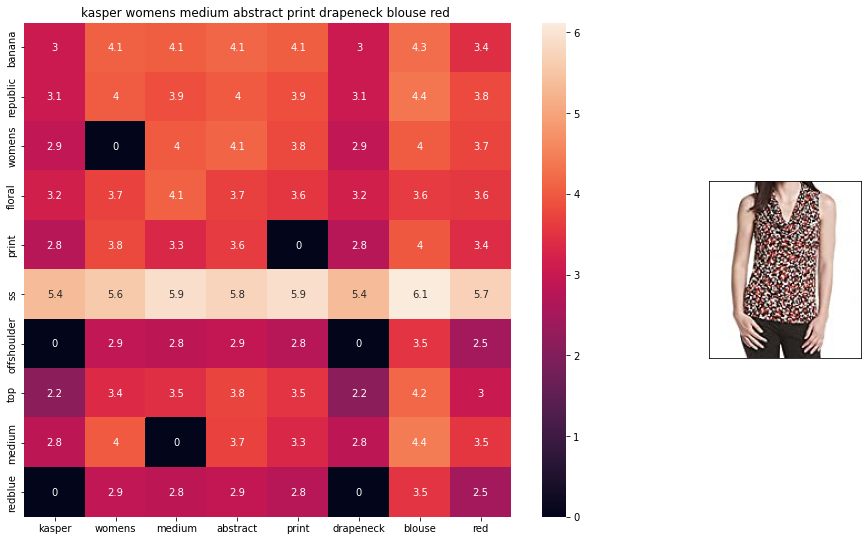

ASIN : B06Y62W833
BRAND : Kasper
euclidean distance from given input image : 0.90472776


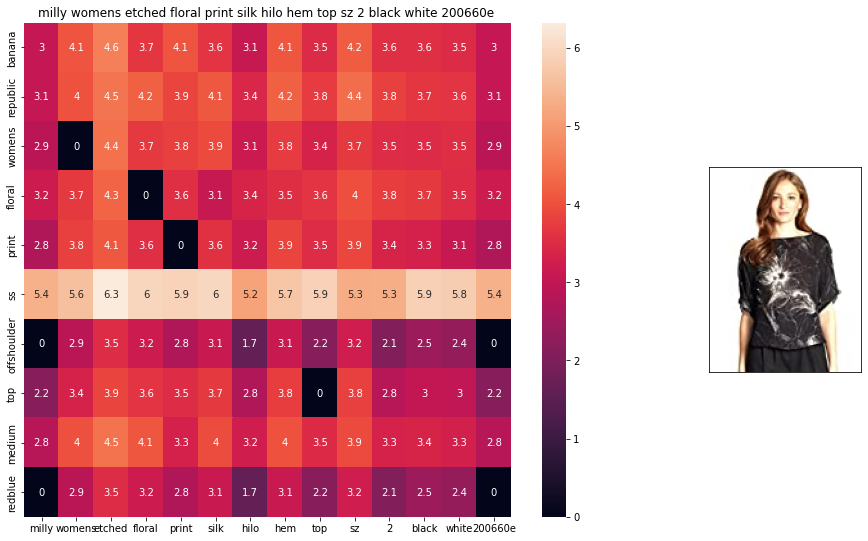

ASIN : B074GFK926
BRAND : MILLY
euclidean distance from given input image : 0.9064416


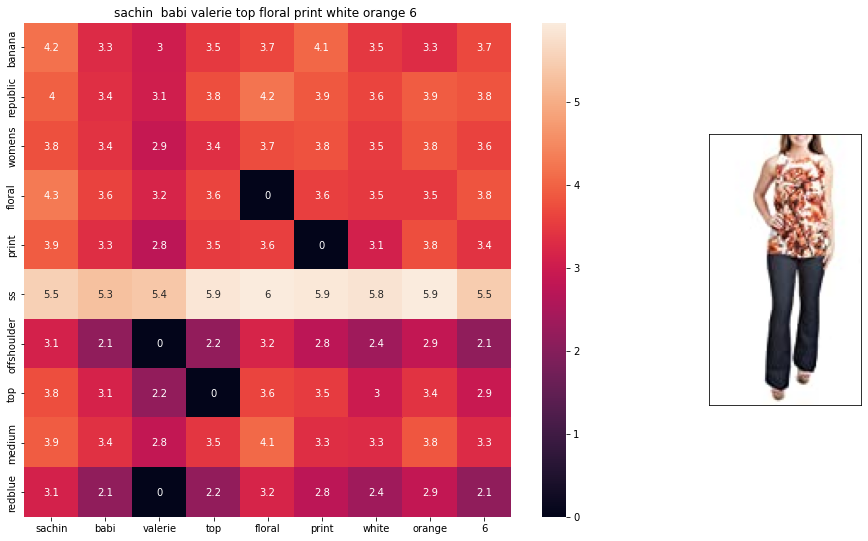

ASIN : B01N6BPV5G
BRAND : Sachin + Babi
euclidean distance from given input image : 0.9099607


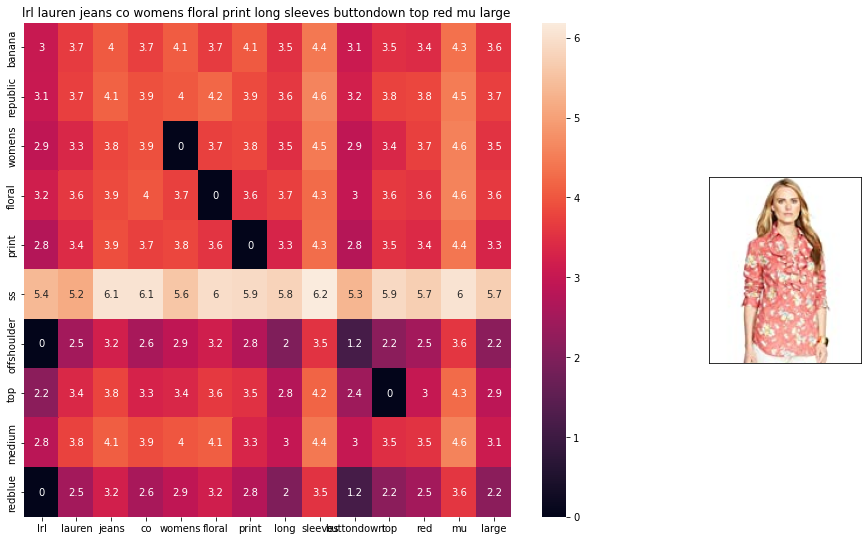

ASIN : B01G2BQ8QK
BRAND : LRL Lauren Jeans Co.
euclidean distance from given input image : 0.91070753


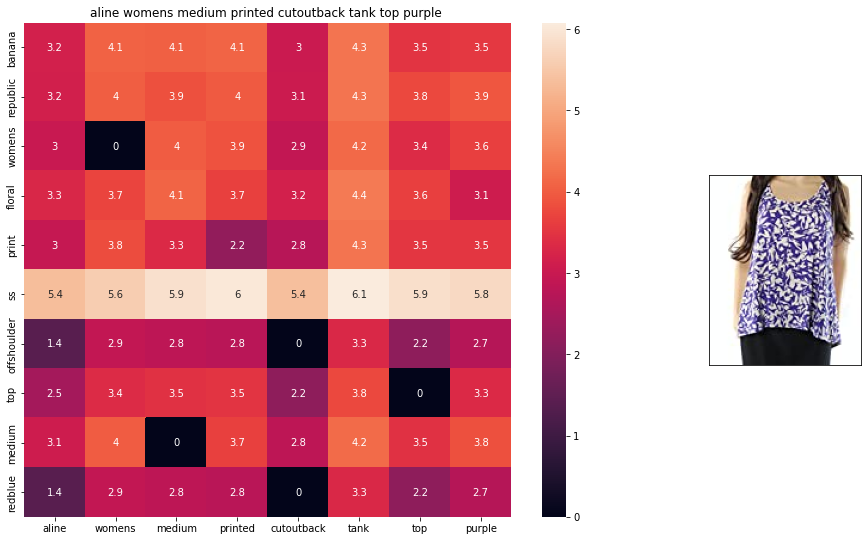

ASIN : B073S6M6YB
BRAND : a_line
euclidean distance from given input image : 0.91076803


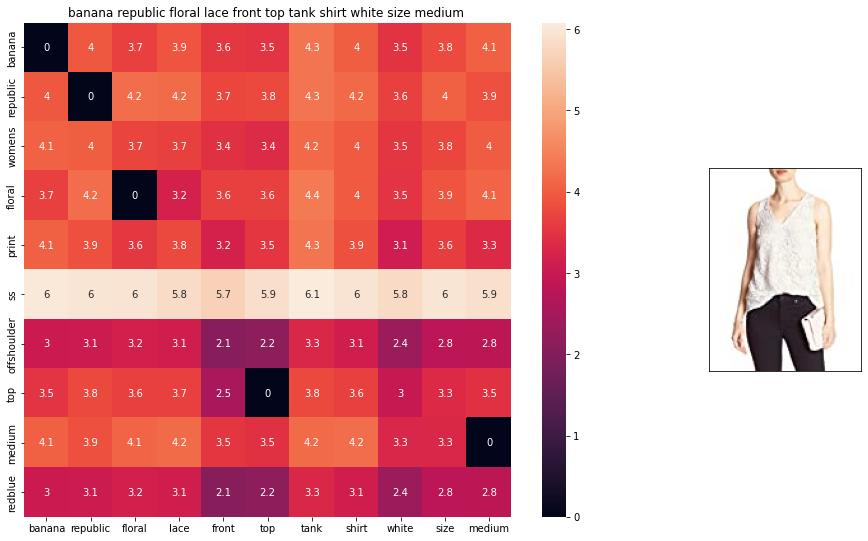

ASIN : B06XNWSHMS
BRAND : Banana Republic
euclidean distance from given input image : 0.91302747


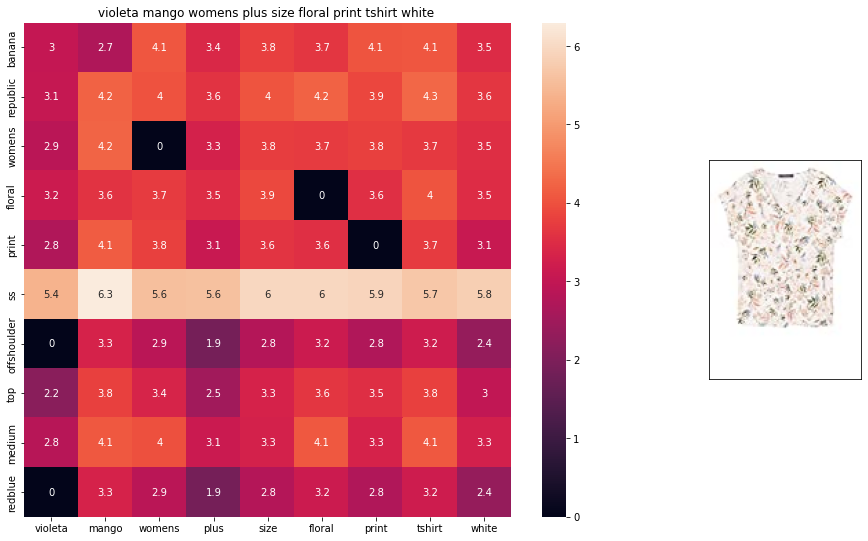

ASIN : B073NKD5SS
BRAND : Violeta by MANGO
euclidean distance from given input image : 0.91323185


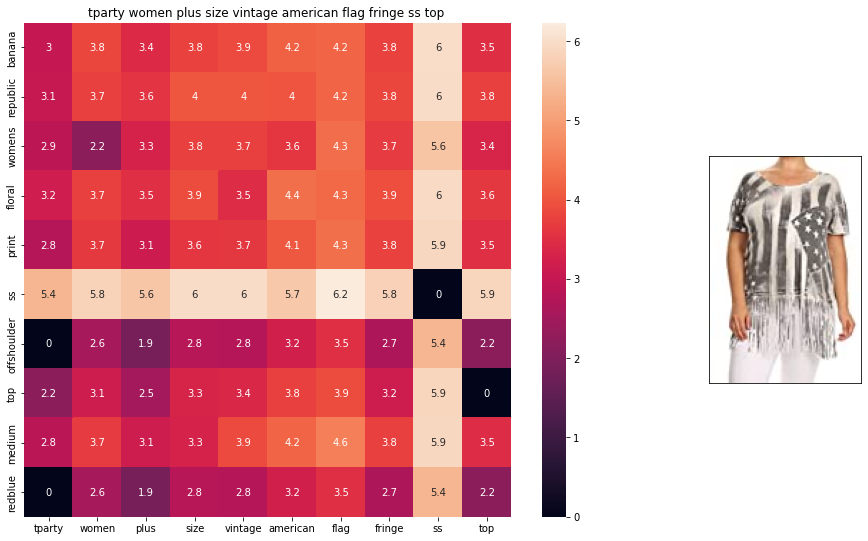

ASIN : B072KLTDLG
BRAND : T Party
euclidean distance from given input image : 0.9137199
Average euclidean distance is  0.8415021866559982


In [40]:
avg_w2v_model(566, 20)

In [41]:
%%time
doc_id = 0
w2v_title_weight = []

for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1

w2v_title_weight = np.array(w2v_title_weight)

Wall time: 18min 8s


In [47]:
weighted_w2v_euclidean=[]
def weighted_w2v_model(doc_id, num_results):    
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    try:
        for i in range(0, len(indices)):
            heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
            print('ASIN :',data['asin'].loc[df_indices[i]])
            print('Brand :',data['brand'].loc[df_indices[i]])
            weighted_w2v_euclidean.append(pdists[i])
            print('euclidean distance from input :', pdists[i])
            print('='*125)
    except:
        pass
    print('Average euclidean distance is ',sum(weighted_w2v_euclidean)/num_results)

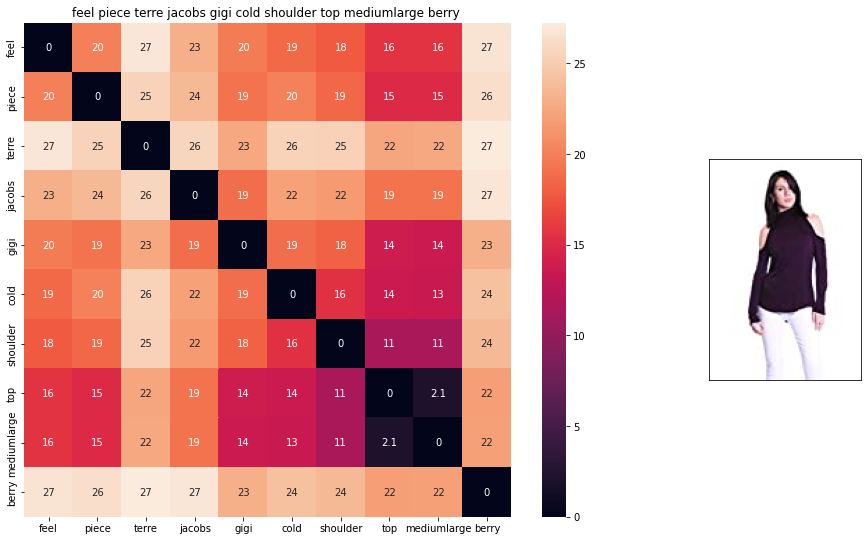

ASIN : B06XTY2F8P
Brand : Feel The Piece
euclidean distance from input : 0.0


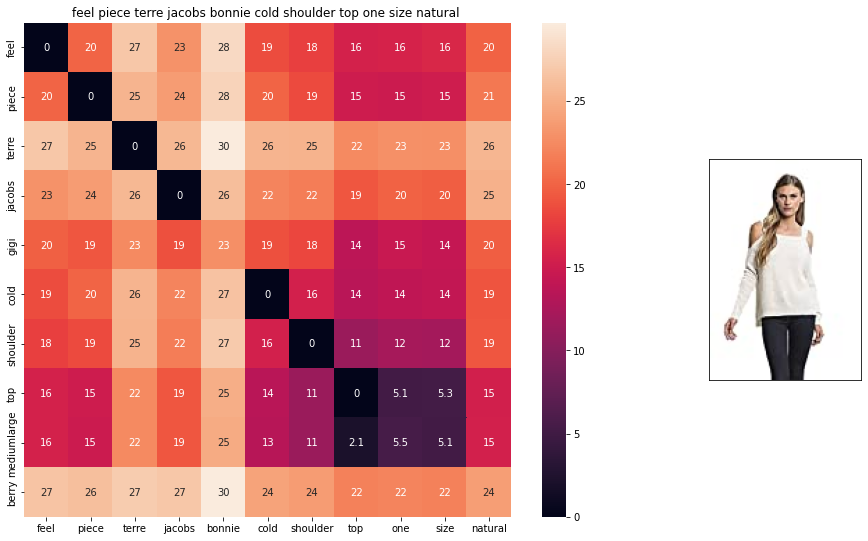

ASIN : B071X149W9
Brand : Feel The Piece
euclidean distance from input : 3.1869981


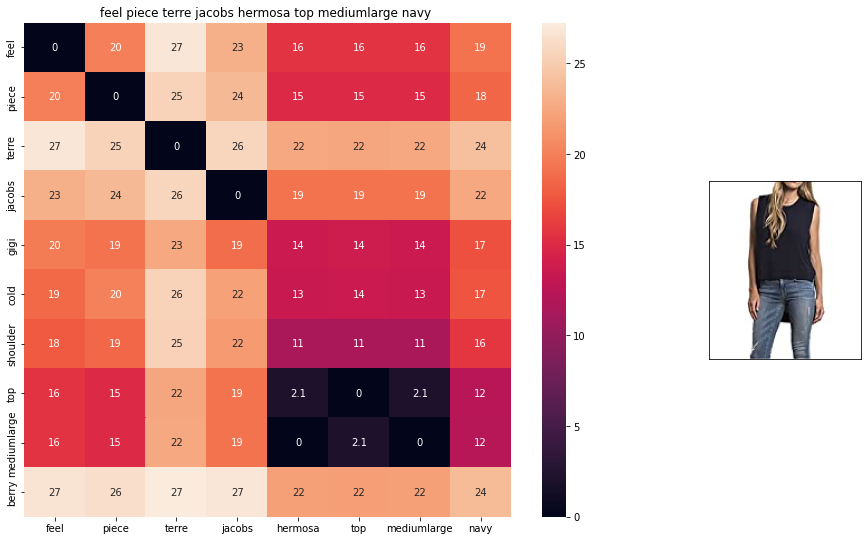

ASIN : B074VXYKZK
Brand : Feel The Piece
euclidean distance from input : 3.4808264


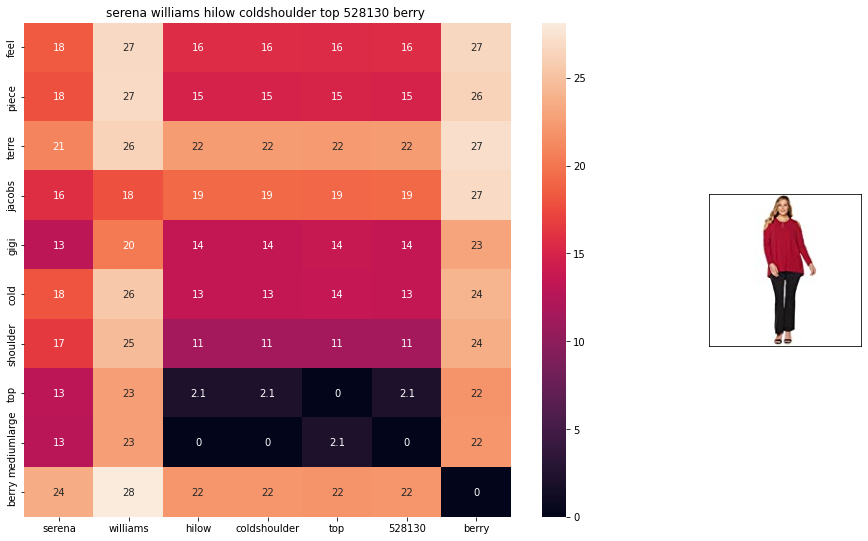

ASIN : B0759X6NV8
Brand : Serena Williams
euclidean distance from input : 4.5262566
Average euclidean distance is  1.1194081068038941


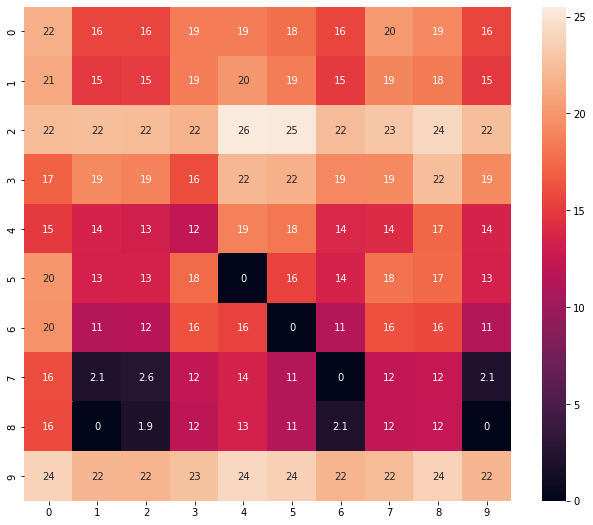

In [48]:
weighted_w2v_model(126, 10)

In [49]:
data['brand'].fillna(value="Not given", inplace=True )
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [50]:
def heat_map_w2v_brand(sentance1, sentance2, url, doc_id1, doc_id2, df_id1, df_id2, model):    
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    
    
    s1_s2_dist = get_distance(s1_vec, s2_vec)
   
    data_matrix = [['Asin','Brand', 'Color', 'Product type'],
               [data['asin'].loc[df_id1],brands[doc_id1], colors[doc_id1], types[doc_id1]], 
               [data['asin'].loc[df_id2],brands[doc_id2], colors[doc_id2], types[doc_id2]]] 
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']]
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    plotly.offline.iplot(table, filename='simple_table')
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    ax1 = plt.subplot(gs[:, :-5])
    
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    
    ax1.set_xticklabels(sentance2.split())
    
    ax1.set_yticklabels(sentance1.split())
    
    ax1.set_title(sentance2)

    
    ax2 = plt.subplot(gs[:, 10:16])
    
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    
    display_img(url, ax2, fig)
    
    plt.show()

In [51]:
brand_colour_euclidean=[]
def idf_w2v_brand(doc_id, w1, w2, num_results):
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        brand_colour_euclidean.append(pdists[i])
        print('euclidean distance from input :', pdists[i])
        print('='*125)
    print('Average euclidean distance is ',sum(brand_colour_euclidean)/num_results)

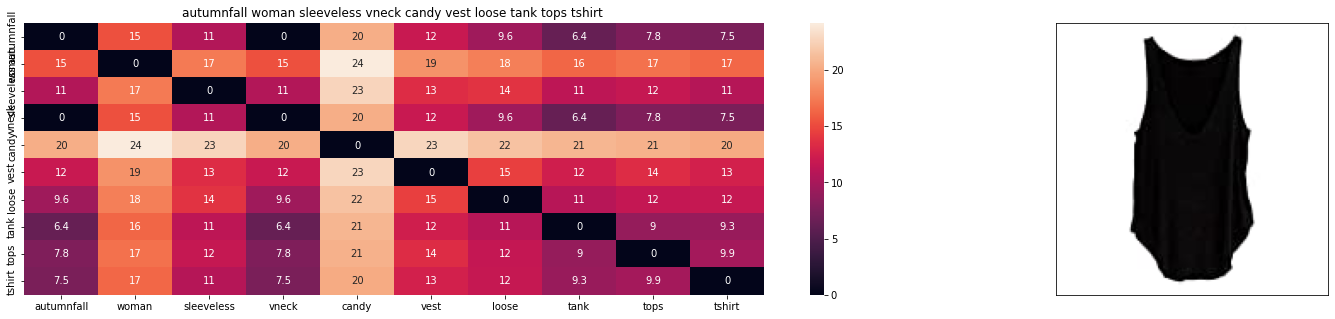

ASIN : B00YONC7AU
Brand : AutumnFall
euclidean distance from input : 4.2146848500124176e-08


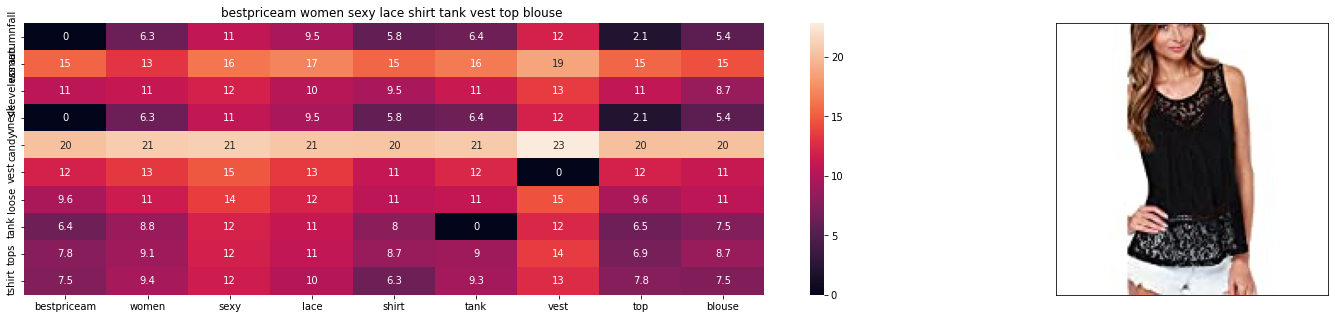

ASIN : B00YE0USAY
Brand : bestpriceam
euclidean distance from input : 2.135294532956567


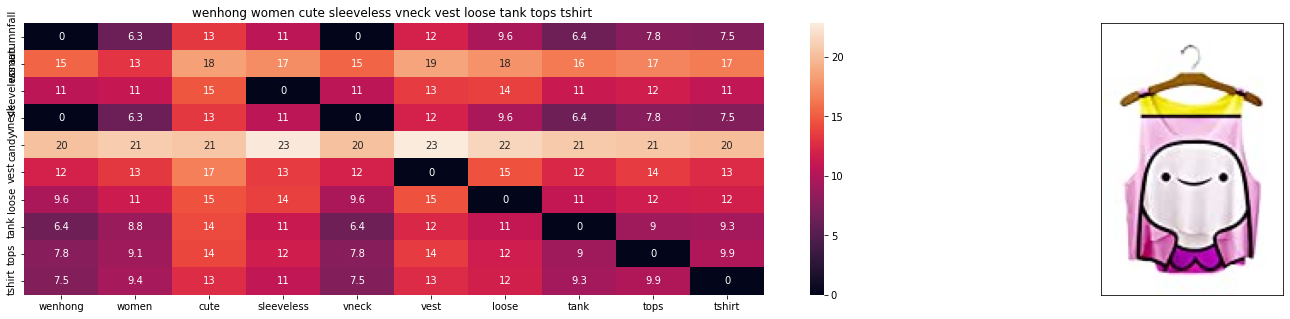

ASIN : B00YBYYPWK
Brand : WenHong
euclidean distance from input : 2.214030075073242


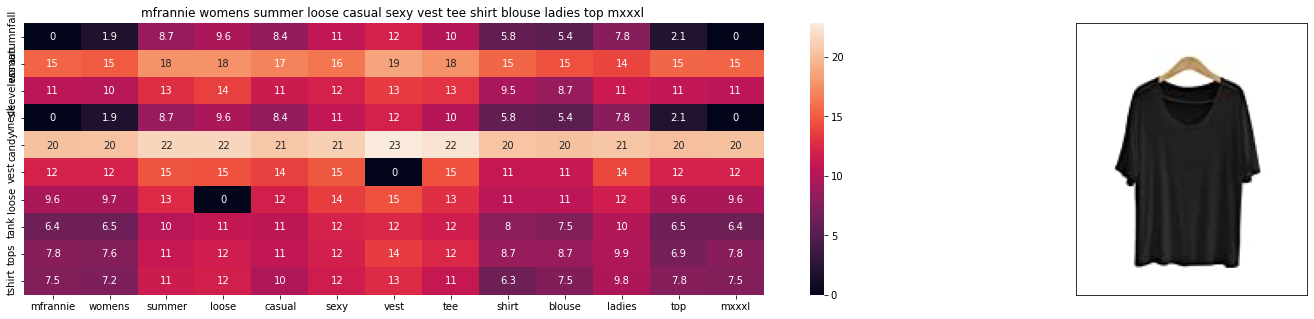

ASIN : B010AVGFIY
Brand : MFrannie
euclidean distance from input : 2.236142921628442


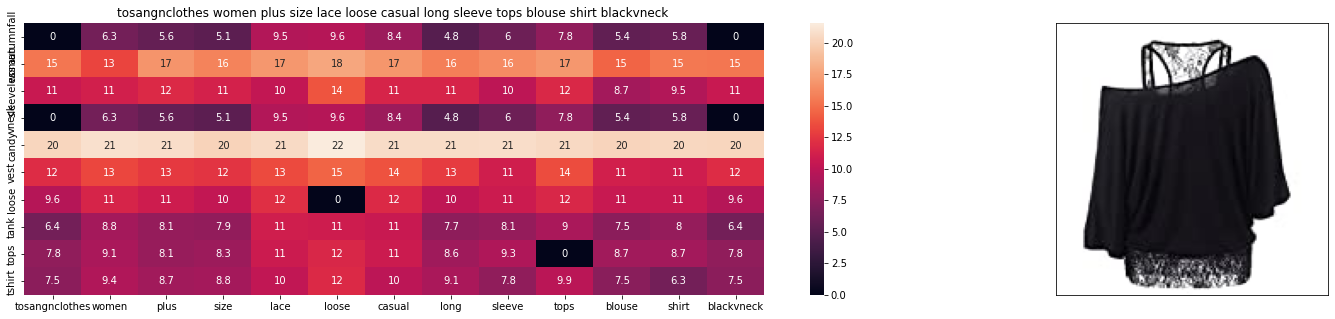

ASIN : B06XFVRWWL
Brand : Tosangn_Clothes
euclidean distance from input : 2.2363612176794674


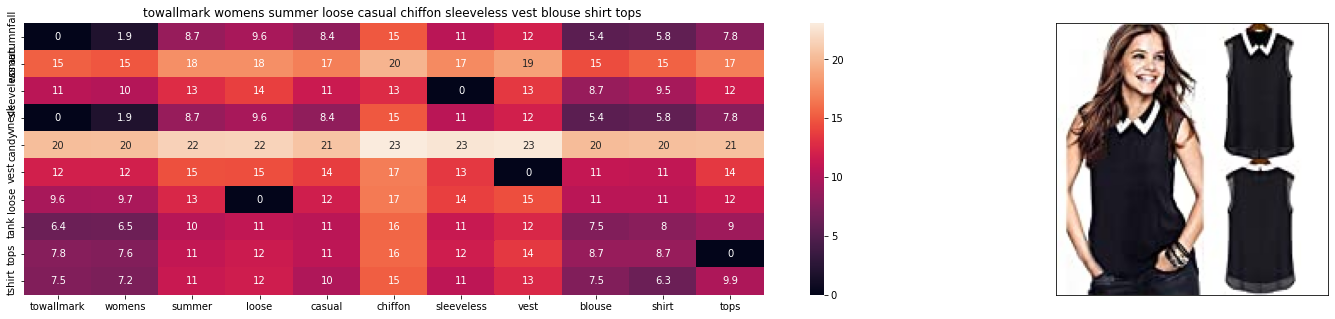

ASIN : B00QGEJ3MA
Brand : Towallmark
euclidean distance from input : 2.2571954728979735


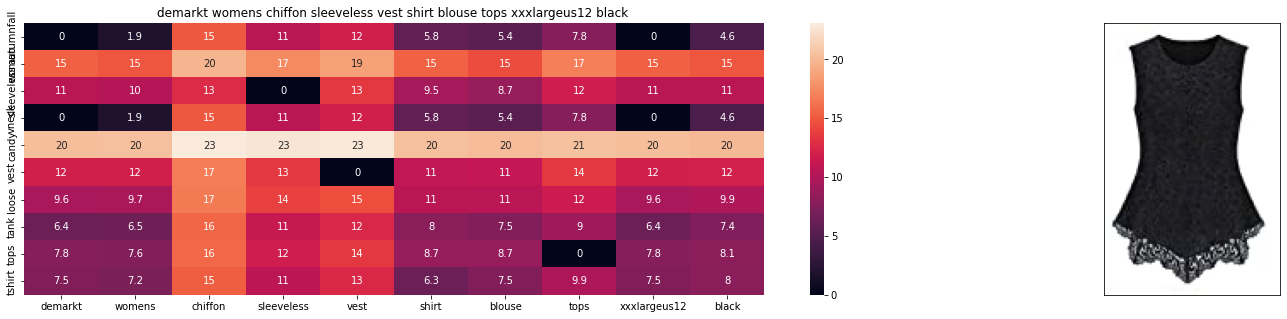

ASIN : B00JKCQZJE
Brand : Demarkt
euclidean distance from input : 2.276511287869897


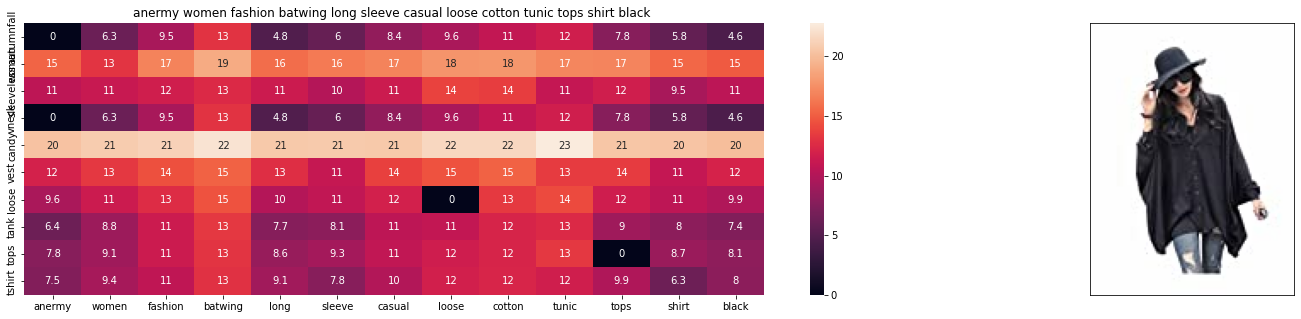

ASIN : B01A6IZM6C
Brand : Anermy
euclidean distance from input : 2.2781511308569575


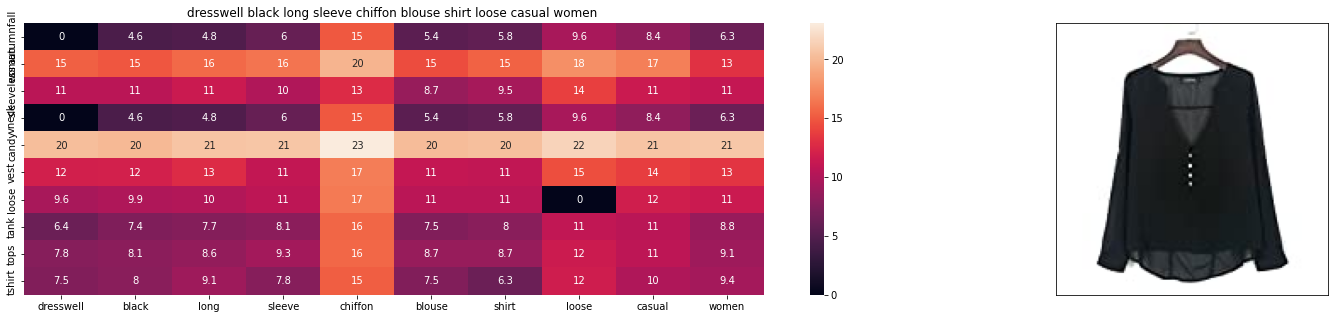

ASIN : B01JS2A3BG
Brand : Dresswell
euclidean distance from input : 2.297120189847436


ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (13).

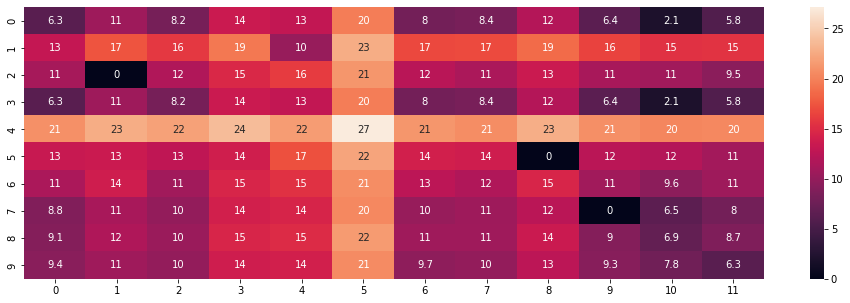

In [52]:
idf_w2v_brand(490, 5, 5, 15) 

In [53]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
ls

In [55]:
%%time

img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = r'Raw_images/'
nb_train_samples = 9000
epochs = 50
batch_size = 1


def save_bottlebeck_features():
    
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    
    model = VGG16(include_top=False, weights='imagenet')
    print('Image Net Pretrained VGG16 weights loaded')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    print('All the images loaded from current directory')
    for i in generator.filenames:
        
        asins.append(i[7:-5])

    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    bottleneck_features_train = bottleneck_features_train.reshape((9000,25088))
    
    np.save(open('9k_data_cnn_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('9k_data_cnn_feature_asins.npy', 'wb'), np.array(asins))
    

save_bottlebeck_features()


Image Net Pretrained VGG16 weights loaded
Found 14338 images belonging to 1 classes.
All the images loaded from current directory
Wall time: 16min 39s


In [62]:
bottleneck_features_train = np.load('9k_data_cnn_features.npy')
asins = np.load('9k_data_cnn_feature_asins.npy')
asins = list(asins)


data = pd.read_pickle('pickels/9391_women_shirts_data')
df_asins = list(data['asin'])


from IPython.display import display, Image, SVG, Math, YouTubeVideo

cnn_euclidean=[]

def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            cnn_euclidean.append(pdists[i])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])
    print('Average euclidean distance is ',sum(cnn_euclidean)/num_results)

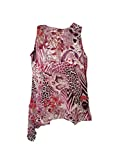

Product Title:  fever womens sleeveless blouse red coral large 
Euclidean Distance from input image: 5.3947965e-06
Amazon Url: www.amzon.com/dp/B06XQ4ZCJK


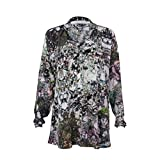

Product Title:  hunter bell womens toppin blouse green multi extra small 
Euclidean Distance from input image: 38.171734
Amazon Url: www.amzon.com/dp/B01N1P0WH5


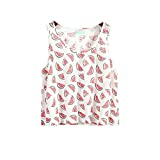

Product Title:  2016 tropical tank crop tops watermelon print women 
Euclidean Distance from input image: 39.063503
Amazon Url: www.amzon.com/dp/B01HUSS62I


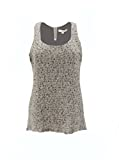

Product Title:  drew womens tweed knit audie top sz ivorygrey 230135f 
Euclidean Distance from input image: 39.88518
Amazon Url: www.amzon.com/dp/B01ETLYQ6E


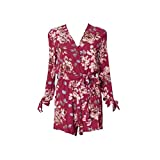

Product Title:  fapizi womens short sleeved jumpsuit tops blouse tshirt xl 
Euclidean Distance from input image: 39.952923
Amazon Url: www.amzon.com/dp/B01IT5CR7Q


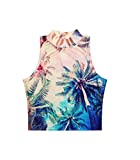

Product Title:  kingde coconut tree digital printing sleeveless vestbqn29 
Euclidean Distance from input image: 40.689045
Amazon Url: www.amzon.com/dp/B015H3WPCK


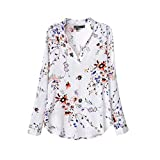

Product Title:  bky v neck floral rayon blouse comfortable white bkyo129 
Euclidean Distance from input image: 40.810284
Amazon Url: www.amzon.com/dp/B00Y8FVYH6


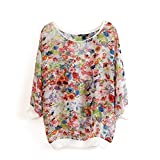

Product Title:  women floral print chiffon tshirt good quality bky5036 
Euclidean Distance from input image: 41.79631
Amazon Url: www.amzon.com/dp/B00R1FN9AK


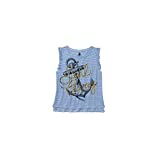

Product Title:  jerry leigh apparel juniors ruffle anchor graphic tank blue small 3 
Euclidean Distance from input image: 42.199135
Amazon Url: www.amzon.com/dp/B01F2UDHGG
Average euclidean distance is  32.256812602396806


In [75]:
get_similar_products_cnn(129,10)

In [76]:
euclidean_distance=[]
num_results=20
euclidean_distance.append(sum(bag_of_words_euclidean)/num_results)
euclidean_distance.append(sum(tf_idf_euclidean)/num_results)
euclidean_distance.append(sum(idf_euclidean)/num_results)
euclidean_distance.append(sum(avg_w2v_euclidean)/num_results)
euclidean_distance.append(sum(weighted_w2v_euclidean)/num_results)
euclidean_distance.append(sum(brand_colour_euclidean)/num_results)
euclidean_distance.append(sum(cnn_euclidean)/num_results)
x=euclidean_distance
y=[]
for i in range(0,47,7):
    y.append(i)

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=["bag_of_words", 'tf_idf', 'idf', 'avg_w2v', 'wt_w2v', 'brand_colour','cnn'], y=euclidean_distance,
                    mode='lines+markers',
                    name='lines+markers'))

fig.update_layout(title='Euclidean Distance Measurement of different components',
                   xaxis_title='Methods',
                   yaxis_title='Euclidean Distance')
fig.update_xaxes(
    ticktext=["Bag of Words", 'TF-IDF', 'IDF', 'Average Word2Vec', 'Weighted Word2Vec', 'Brand Colour','CNN'],
    tickvals=["bag_of_words", 'tf_idf', 'idf', 'avg_w2v', 'wt_w2v', 'brand_colour','cnn'],
)
fig.show()

In [86]:
fig = px.histogram( x=["Bag of Words", 'TF-IDF', 'IDF', 'Average Word2Vec', 'Weighted Word2Vec', 'Brand Colour','CNN'], y=euclidean_distance, histfunc='sum')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig.update_layout(title='Euclidean Distance Measurement of different components',
                   xaxis_title='Methods',
                   yaxis_title='Euclidean Distance')
fig.show()

In [91]:
data.to_csv('Recommendations based on  Amazon Women Shirts data.csv',index=False)